<div class="markdown-google-sans" style="text-align: center; max-width: 600px; margin: auto;">
  
  # <b><span style='color:#E1B12D'>Data Pre-Processing [STAGE2] </span></b>
  ## BLI DATA

  ---
  
  <span style="color:#27AE60; font-size: 1.2em;"><b>Febriyan Chandra</b></span> — Project Manager  
  <span style="color:#2980B9; font-size: 1.2em;"><b>Ramadani Saputra</b></span> — Data Engineer  
  <span style="color:#8E44AD; font-size: 1.2em;"><b>I Putu Ferry Wistika</b></span> — Data Scientist   

</div>


# **Import Library**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)


# **Ekstraksi Data**

In [2]:
# Ekstraksi data
raw_data = pd.read_csv('full_data_ecommerce.csv')

# Tampilkan sampel data
raw_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
2  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   

   customer_state order_status order_purchase_timestamp    order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
1  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
2  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00  2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00  2018-08-08 08:55:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2017-10-04 19:55:00           2017-10-10 21:25:00   
2          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2017-10-18       1.000000   
2                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  87285b34884572647811a353c7ac498a            Housewares   
2  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            40.000000                  268.000000            4.000000   
2            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        500.000000          19.000000           8.000000         13.000000   
2        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
2  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
2  a54f0611adc9ed256b5

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118492 entries, 0 to 118491
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118492 non-null  object 
 1   customer_id                    118492 non-null  object 
 2   customer_unique_id             118492 non-null  object 
 3   customer_zip_code_prefix       118492 non-null  int64  
 4   customer_city                  118492 non-null  object 
 5   customer_state                 118492 non-null  object 
 6   order_status                   118492 non-null  object 
 7   order_purchase_timestamp       118492 non-null  object 
 8   order_approved_at              118316 non-null  object 
 9   order_delivered_carrier_date   116425 non-null  object 
 10  order_delivered_customer_date  115102 non-null  object 
 11  order_estimated_delivery_date  118492 non-null  object 
 12  order_item_id                 

In [4]:
# Mengonversi kolom yang memiliki '_date' menjadi datetime
date_columns = [col for col in raw_data.columns if '_date' in col]

# Mengonversi kolom-kolom tersebut menjadi datetime
for col in date_columns:
    raw_data[col] = pd.to_datetime(raw_data[col], errors='coerce')

# Mengonversi kolom 'order_purchase_timestamp' menjadi datetime
raw_data['order_purchase_timestamp'] = pd.to_datetime(raw_data['order_purchase_timestamp'], errors='coerce')
raw_data['order_approved_at'] = pd.to_datetime(raw_data['order_approved_at'], errors='coerce')


# Memeriksa tipe data setelah konversi
print(raw_data.dtypes)


order_id                                 object
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
product_category_name                    object
product_name_length                     float64
product_description_length              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

In [5]:
raw_data['purchased_approved'] = (raw_data.order_approved_at -raw_data.order_purchase_timestamp).dt.seconds
raw_data['approved_carrier'] = (raw_data.order_delivered_carrier_date - raw_data.order_approved_at).dt.days
raw_data['carrier_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_delivered_carrier_date).dt.days
raw_data['delivered_estimated'] = (raw_data.order_estimated_delivery_date - raw_data.order_delivered_customer_date).dt.days
raw_data['purchased_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_purchase_timestamp).dt.days
raw_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
2  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   

   customer_state order_status order_purchase_timestamp   order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
1  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
2  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00 2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00 2018-08-08 08:55:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2017-10-04 19:55:00           2017-10-10 21:25:00   
2          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2017-10-18       1.000000   
2                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  87285b34884572647811a353c7ac498a            Housewares   
2  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            40.000000                  268.000000            4.000000   
2            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        500.000000          19.000000           8.000000         13.000000   
2        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
2  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
2  a54f0611adc9ed256b57ede6b

New columns are created using the available datetime columns for easy analysis of the available data.
- Purchased_approved represents the seconds taken for an order to get approved after the customer purchases it.
- approved_carrier represents the days taken for the order to go to the delivery carrier after it being approved.
- carrier_delivered represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.
- delivered_estimated represents the date difference between the estimated delivery date and the actual delivery date.
- purchased_delivered represents the days taken for the order to be delivered to the customer from the date the customer made the purchase.

# 2. Data Labelling for Churn Analysis

RFM analysis is a data driven customer behavior segmentation technique.


RFM stands for recency, frequency, and monetary value.


The idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

## Recency

In [6]:
#Recency
recency = raw_data.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

customer_unique_id    LastPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:00
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:00
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:00
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:00
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:00

In [7]:
recent_date = raw_data['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-10-17


In [8]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:00      160
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:00      163
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:00      586
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:00      370
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:00      337

The last purchase date of every individual customer is taken using the group by function.
Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date.

## Frequency

In [9]:
frequency = raw_data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

Frequency is calculated by selecting the number of unique order_id or orders placed by each individual customer.

## Monetary

In [10]:
monetary = raw_data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

customer_unique_id   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f  27.190000
2  0000f46a3911fa3c0805444483337064  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078  43.620000
4  0004aac84e0df4da2b147fca70cf8255 196.890000

In [11]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

customer_unique_id  Recency  Frequency   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000
2  0000f46a3911fa3c0805444483337064      586          1  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000

Monetary is calculated by summing up the payment value of each individual customer who placed one or more orders.

## Analysing the RFM data

In [12]:
rfm[rfm.Recency == 0]

customer_unique_id  Recency  Frequency  Monetary
50842  87ab9fec999db8bd5774917de3cdf01c        0          1 89.710000

In [13]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

The recency column had values 0, i.e., a customer came at the last day of the date which we took as the threshold to calculate recency.
0 in recency should be treated or removed for creating the target variable, i.e., Churn and for further process of scaling or normalization, so the 0 is converted to 1 for our convenience.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_71603/2320870263.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




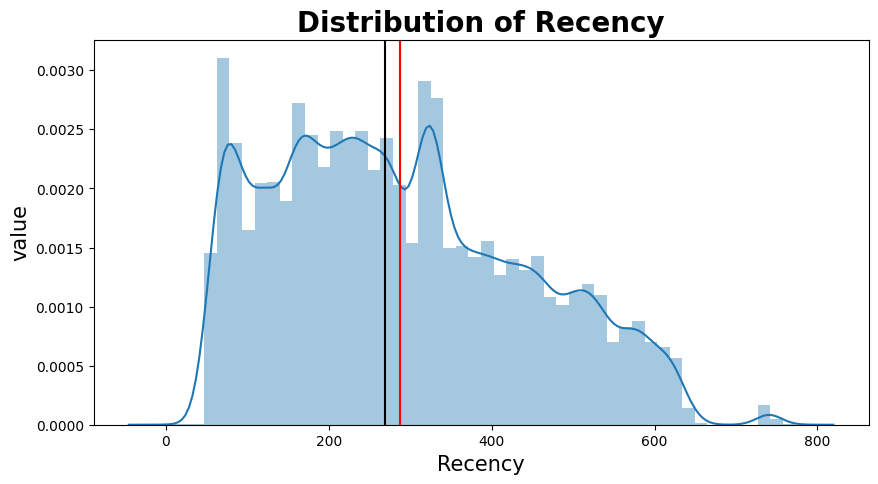

Mean of recency:  288.1347309763326
Median of recency:  269.0
Skewness of recency:  0.44561889147979705


In [14]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_71603/3214567786.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




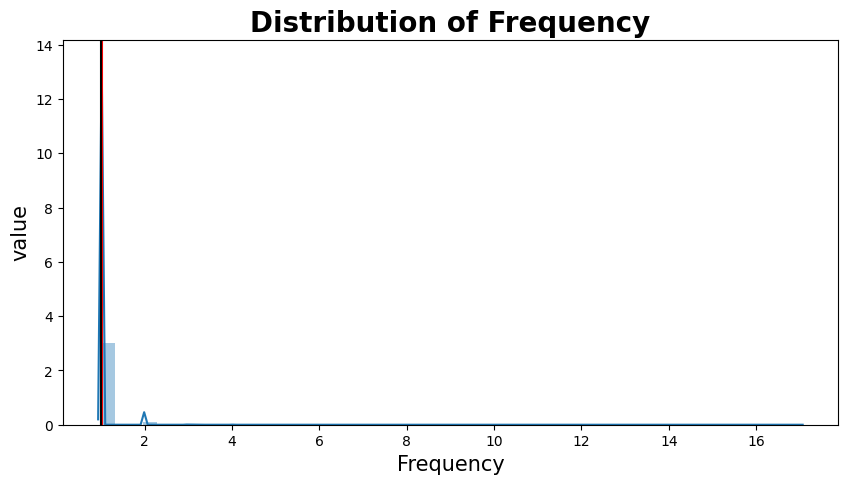

Mean of frequency:  1.0348019368034396
Median of frequency:  1.0
Skewness of frequency:  11.877436346029382


In [15]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_71603/4197457027.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/putuwistika/.pyenv/versions/3.10.16/envs/digits/lib/python3.10/site-packages/seaborn/distributions.py:2496: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



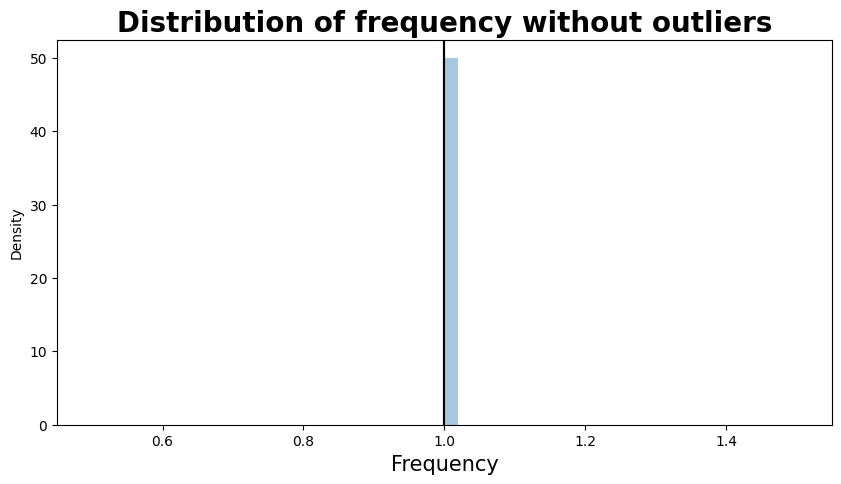

In [16]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [17]:
frequencyDistribution.Frequency.describe()

count   92840.000000
mean        1.000000
std         0.000000
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Frequency, dtype: float64

The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1.
So the frequency will not help in our analysis and also to segment the customers.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_71603/15804976.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




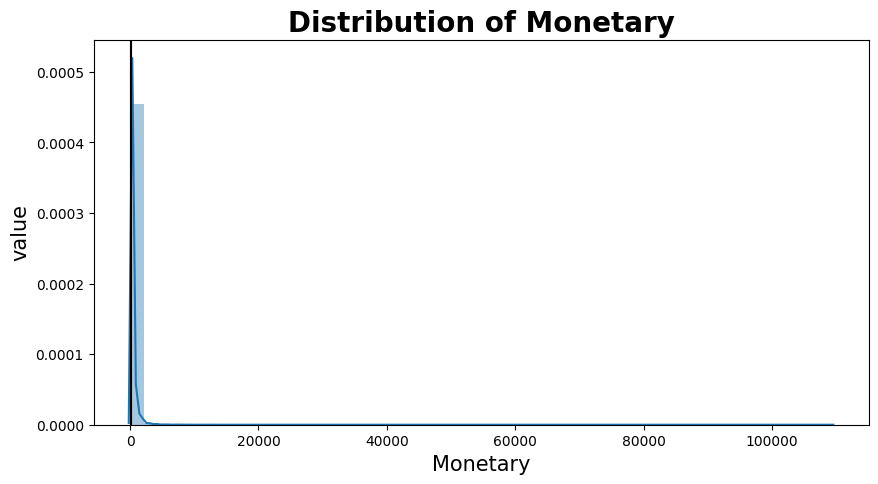

Mean of monetary:  213.62360677463795
Median of monetary:  113.33
Skewness of monetary:  68.30206113062893


In [18]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [19]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

customer_unique_id  Recency  Frequency   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000
2  0000f46a3911fa3c0805444483337064      586          1  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_71603/1803402267.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




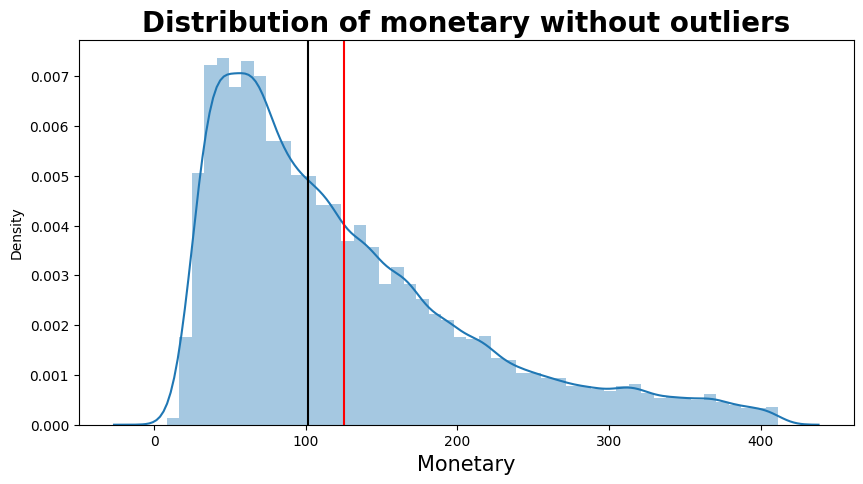

In [20]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [21]:
monetaryDistribution.Monetary.describe()

count   86430.000000
mean      125.239254
std        85.487772
min         0.000000
25%        60.070000
50%       101.740000
75%       167.197500
max       411.690000
Name: Monetary, dtype: float64

The average monetary value after outlier treatement is 123.45, while the median value is 99.90.
The middle 50% of values of monetary lie between 59.38 and 165.3.

## Customer Segmentation

In [22]:
# Labels for Recency

ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

164.0 269.0 397.0


In [23]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [24]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  
0              1  
1              1  
2              4  
3              3  
4              3

Recency label breakdown:
- 1 - These are the customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)
- 2 - These are the customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)
- 3 - These are the customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)
- 4 - These are the customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

In [25]:
# Labels for Monetary

ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

64.0 113.33 203.08


In [26]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [27]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  
0              1               2  
1              1               4  
2              4               3  
3              3               4  
4              3               2

Monetary label breakdown:
- 1 - These are the customers who spend large amount. (Monetary value within the 25% quantile)
- 2 - These are the customers who spend good amount. (Monetary value between 25% and 50% quantile)
- 3 - These are the customers who spend moderately. (Monetary value between 50% and 75% quantile)
- 4 - These are the customers who spend the least. (Monetary value more than 75% quantile)

In [28]:
#Labels for Frequency

rfm.Frequency.value_counts()

Frequency
1     92840
2      2737
3       202
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

In [29]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [30]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label  
0              1               2                4  
1              1               4                4  
2              4               3                4  
3              3               4                4  
4              3               2                4

Frequency label breakdown:
- 1 - These are the most frequent customers. (Frequency > 3)
- 2 - These are the frequent frequent customers. (Frequency = 3)
- 3 - These are the somewhat frequent customers. (Frequency = 2)
- 4 - These are the least frequent customers. (Frequency = 1)

In [31]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank  
0              1               2                4  (1, 2, 4)  
1              1               4                4  (1, 4, 4)  
2              4               3                4  (4, 3, 4)  
3              3               4                4  (3, 4, 4)  
4              3               2                4  (3, 2, 4)

In [32]:
rfm.recency_label.value_counts()

recency_label
1    24118
4    23945
2    23920
3    23845
Name: count, dtype: int64

In [33]:
rfm.frequency_label.value_counts()

frequency_label
4    92840
3     2737
2      202
1       49
Name: count, dtype: int64

In [34]:
rfm.monetary_label.value_counts()

monetary_label
4    24020
2    23956
1    23950
3    23902
Name: count, dtype: int64

In [35]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank rank_rm  
0              1               2                4  (1, 2, 4)  (1, 2)  
1              1               4                4  (1, 4, 4)  (1, 4)  
2              4               3                4  (4, 3, 4)  (4, 3)  
3              3               4                4  (3, 4, 4)  (3, 4)  
4              3               2                4  (3, 2, 4)  (3, 2)

In [36]:
rfm.rank_rm.value_counts()

rank_rm
(1, 2)    6186
(4, 3)    6147
(1, 1)    6117
(4, 4)    6105
(2, 2)    6104
(3, 3)    6104
(2, 4)    6047
(3, 1)    5983
(1, 4)    5979
(2, 1)    5954
(4, 1)    5896
(3, 4)    5889
(3, 2)    5869
(1, 3)    5836
(2, 3)    5815
(4, 2)    5797
Name: count, dtype: int64

Meaning of ranks:
The most important and least important customers (Recency Rank, Monetary Rank):

Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank
The most important ranks:

- (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
- (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
- (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
- (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
- (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money

The least important ranks:

- (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
- (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
- (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
- (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
- (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

Since most of the frequency class is 4, we will use only recency and monetary for customer segmentation.

Insights from Recency Ranks:

1. Customers can be incentivised to purchase more in our store using offers/discounts/events which will make them more recent and at the same time bring in more money
2. Customers will use our store if the website is user-friendly and quick. This will help make the customer's shopping experience smooth meaning they will continue coming back to our store/website for their purchasing needs
3. When advertising using digital marketing techniques:
- Customers who have a low recency ranks should be targeted less or removed from advertisement lists as it will not bring as much or even returns/sales (This can also be done using customer's time spent on website but that will be for a future project)
- Customers who have high recency ranks should be targeted more extensively as it will bring a lot of sales in return

Insights from Monetary Ranks:

1. Customer's monetary values can be increased with a better algorithm which will recommend similar/useful items when an item is added to cart

Insights from Frequency Ranks:
97% (89100 out of 91832) of the customers have the lowest frequency rank (4) meaning they are very infrequent in their purchases. In order to combat this:-

- Local language can be used in the ecommerce platform/store
- Extend special offers for repeated purchases
- Encourage Loyalty programs
- Lower the Product Pricing for Increased Customer Frequency

## Creating a target variable

In [37]:
rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank rank_rm  Churn  
0              1               2                4  (1, 2, 4)  (1, 2)      0  
1              1               4                4  (1, 4, 4)  (1, 4)      0  
2              4               3                4  (4, 3, 4)  (4, 3)      1  
3              3               4                4  (3, 4, 4)  (3, 4)      1  
4              3               2                4  (3, 2, 4)  (3, 2)      1

In [38]:
rfm['Churn'].value_counts()

Churn
0    52529
1    43299
Name: count, dtype: int64

In [39]:
final = raw_data.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], on = 'customer_unique_id')
final.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
2  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   

   customer_state order_status order_purchase_timestamp   order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
1  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
2  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00 2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00 2018-08-08 08:55:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2017-10-04 19:55:00           2017-10-10 21:25:00   
2          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2017-10-18       1.000000   
2                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  87285b34884572647811a353c7ac498a            Housewares   
2  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            40.000000                  268.000000            4.000000   
2            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        500.000000          19.000000           8.000000         13.000000   
2        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
2  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
2  a54f0611adc9ed256b57ede6b

In [40]:
records, features = final.shape
print('Total number of unique records: ', records)
print('Total number of features: ', features)

Total number of unique records:  118492
Total number of features:  46


In [41]:
final['Churn'] = final.Churn.astype('object')

# 2. Data Cleansing

## 1.1 Handle missing values

In [42]:
df = final.copy()

In [43]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
                               Missing Values  Percentage
order_approved_at                         176    0.148533
order_delivered_carrier_date             2067    1.744422
order_delivered_customer_date            3390    2.860953
order_item_id                            1051    0.886980
product_id                               1051    0.886980
product_category_name                    2775    2.341930
product_name_length                      2750    2.320832
product_description_length               2750    2.320832
product_photos_qty                       2750    2.320832
product_weight_g                         1071    0.903858
product_length_cm                        1071    0.903858
product_height_cm                        1071    0.903858
product_width_cm                         1071    0.903858
seller_id                                1051    0.886980
seller_city                              2698    2.276947
seller_state                             2698 

In [44]:
# Menghapus baris yang memiliki missing values
df = df.dropna(axis=0, how='any')

In [45]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## 1.2 Handle duplicated data

In [46]:
# Mengecek apakah ada duplikat di setiap baris
duplicates = df.duplicated()

# Menampilkan jumlah duplikat dan baris yang duplikat
print(f"Jumlah baris duplikat: {duplicates.sum()}")
print("Baris yang duplikat:")
print(df[duplicates])

Jumlah baris duplikat: 0
Baris yang duplikat:
Empty DataFrame
Columns: [order_id, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_id, seller_city, seller_state, review_id, review_score, review_creation_date, review_answer_timestamp, payment_sequential, payment_type, payment_installments, payment_value, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, purchased_approved, approved_carrier, carrier_delivered, delivered_estimated, purchased_delivered, Recency, Monetary, Frequency, Churn]
Index: []


# 3. Split Data

Data Split (untuk menghindari data leakage): Setelah data dibersihkan, Anda sebaiknya membagi data menjadi set pelatihan (train), validasi (val), dan pengujian (test). Lakukan pembagian data sebelum melakukan feature transformation atau encoding untuk menghindari data leakage, yaitu ketika informasi dari data test "terpapar" ke model selama pelatihan. Ini bisa menyebabkan overfitting.

## 3.1 Data Split

In [47]:
data = df.copy()

In [48]:
# Mendapatkan data churn
churn = data['Churn']

# Menghitung persentase dan jumlah churn serta non-churn
churn_percentage = round(churn.value_counts(normalize=True).iloc[1] * 100, 2)
non_churn_percentage = round(churn.value_counts(normalize=True).iloc[0] * 100, 2)
churn_count = churn.value_counts().iloc[1]
non_churn_count = churn.value_counts().iloc[0]

# Menampilkan hasil
print(f"Percentage of Churn: {churn_percentage} %  --> ({churn_count} customers)")
print(f"Percentage of Customers Did Not Churn: {non_churn_percentage} %  --> ({non_churn_count} customers)")


Percentage of Churn: 44.6 %  --> (49519 customers)
Percentage of Customers Did Not Churn: 55.4 %  --> (61500 customers)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111019 entries, 0 to 118488
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111019 non-null  object        
 1   customer_id                    111019 non-null  object        
 2   customer_unique_id             111019 non-null  object        
 3   customer_zip_code_prefix       111019 non-null  int64         
 4   customer_city                  111019 non-null  object        
 5   customer_state                 111019 non-null  object        
 6   order_status                   111019 non-null  object        
 7   order_purchase_timestamp       111019 non-null  datetime64[ns]
 8   order_approved_at              111019 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111019 non-null  datetime64[ns]
 10  order_delivered_customer_date  111019 non-null  datetime64[ns]
 11  order

In [50]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = data.drop(columns=['Churn'])  # Fitur (tanpa target)
y = data['Churn']  # Target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek hasil split
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 88815
Jumlah data uji: 22204


# 4. Feature Transformation

In [51]:
X_train

order_id                       customer_id  \
65071   6df5ccb6ecd13e123c2a9a0a5ed0ae9f  1266651e5dfcd12269d5242ab75b2064   
2818    7d1ac7d65c6b5d59a9ac241fa41da57d  dcc13a2d32ff7ec6e1920580280f704c   
105987  5f19271c1eb0a8eb0a1efed995df752b  0551b1b0b246b2433f94f989661aea95   
62668   8e075f06285446d7a9e69956e64309ec  60228c33dfb376c26f079c73e5a39ea5   
67233   efe2108824219f6b3a7e54ef457bc91d  893a9e454d2a2cdbc233a20981a10429   
...                                  ...                               ...   
38163   4aa1a55da45bb1b3b091aba5f4e37783  63888b10b5f5967d55158748f46981d3   
17812   90feb1846fa42bbfe6d411d2d018d194  02afc864fbc233378368b0c0980f576c   
14546   01405161cfdf60dd80df1f393a2796d5  50a5ce7e867f2fabc3eb4703dfb432df   
40033   7f116bbf2524150eb7f7f2a5f0b458eb  309f516c4449dbadf7ebaa01e00bbed3   
104110  9f28bebb21ed4b8984afe68c7ef6e127  e243e7b7e604780c67d191a96f23e634   

                      customer_unique_id  customer_zip_code_prefix  \
65071   dcef3399bb685b394b3c6897fe7d64cd                      4143   
2818    00d03b5e33f8987549c5590313a4ef21                     96690   
105987  8cec0fae588fbd27984abcec9ba0bea6                      3682   
62668   63bcee47cacac3b19195b5519eb71a1c                     44024   
67233   81bb610831a61b88967d67db7bc5fb6a                      9240   
...                                  ...                       ...   
38163   11485345fb6725061bf820526057715d                      6874   
17812   7c2f052b624ffd95256127dd8236903e                      5468   
14546   23be4b5b1e9add3f80da9607e9de5775                      4433   
40033   3e93e73cdacdde61472f583e51cf2374                      4361   
104110  8be0d7f2b796064b601cf9933bf6a3ff                      7600   

       customer_city  customer_state order_status order_purchase_timestamp  \
65071   Akkarampalle  Andhra Pradesh    delivered      2018-08-04 13:20:00   
2818      Poolambadi      Tamil Nadu    delivered      2017-06-16 23:17:00   
105987  Akkarampalle  Andhra Pradesh    delivered      2018-06-26 16:28:00   
62668        Isnapur  Andhra Pradesh    delivered      2017-08-26 21:53:00   
67233    Bheemavaram  Andhra Pradesh    delivered      2018-04-13 18:31:00   
...              ...             ...          ...                      ...   
38163     Khambhalia         Gujarat    delivered      2018-08-18 18:37:00   
17812   Akkarampalle  Andhra Pradesh    delivered      2018-05-23 12:38:00   
14546   Akkarampalle  Andhra Pradesh    delivered      2018-08-09 21:16:00   
40033   Akkarampalle  Andhra Pradesh    delivered      2018-01-06 11:06:00   
104110        Bawana           Delhi    delivered      2018-01-19 11:05:00   

         order_approved_at order_delivered_carrier_date  \
65071  2018-08-04 14:00:00          2018-08-09 13:06:00   
2818   2017-06-16 23:30:00          2017-06-19 11:15:00   
105987 2018-06-27 08:11:00          2018-07-05 09:41:00   
62668  2017-08-26 22:16:00          2017-08-28 18:56:00   
67233  2018-04-13 18:52:00          2018-04-17 23:28:00   
...                    ...                          ...   
38163  2018-08-18 19:09:00          2018-08-20 13:35:00   
17812  2018-05-23 12:54:00          2018-05-24 13:23:00   
14546  2018-08-09 21:30:00          2018-08-13 10:05:00   
40033  2018-01-06 11:18:00          2018-01-10 14:43:00   
104110 2018-01-19 11:16:00          2018-01-23 18:14:00   

       order_delivered_customer_date order_estimated_delivery_date  \
65071            2018-08-10 16:38:00                    2018-08-13   
2818             2017-06-29 11:06:00                    2017-08-02   
105987           2018-07-06 12:34:00                    2018-07-24   
62668            2017-09-08 22:42:00                    2017-09-22   
67233            2018-04-18 15:06:00                    2018-05-02   
...                              ...                           ...   
38163            2018-08-27 18:55:00                    2018-09-04   
17812            2018-05-25 14:12:00            

## 4.1 Handle outliers

In [52]:
# Deteksi dan penanganan outlier pada X_train
print("\n3. Outliers Check (using Z-score method):")
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
outliers_summary = {}


3. Outliers Check (using Z-score method):


In [53]:
# Deteksi outlier dengan Z-score
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train[column].dropna()))
    outliers = len(z_scores[z_scores > 3])
    if outliers > 0:
        outliers_summary[column] = outliers

In [54]:
# Ringkasan outlier
if outliers_summary:
    print("Number of outliers (|Z-score| > 3) per column:")
    for col, count in outliers_summary.items():
        print(f"{col}: {count} outliers")
else:
    print("No significant outliers found in numeric columns")

Number of outliers (|Z-score| > 3) per column:
order_item_id: 1474 outliers
product_name_length: 432 outliers
product_description_length: 2200 outliers
product_photos_qty: 1288 outliers
product_weight_g: 2207 outliers
product_length_cm: 1755 outliers
product_height_cm: 2018 outliers
product_width_cm: 1389 outliers
payment_sequential: 757 outliers
payment_installments: 306 outliers
payment_value: 1351 outliers
geolocation_lat: 2317 outliers
geolocation_lng: 518 outliers
purchased_approved: 1659 outliers
approved_carrier: 1554 outliers
carrier_delivered: 1467 outliers
delivered_estimated: 1243 outliers
purchased_delivered: 1444 outliers
Monetary: 630 outliers
Frequency: 791 outliers


Skewness of customer_zip_code_prefix: 0.7889223189442623
Standard deviation of customer_zip_code_prefix: 29842.34913624671


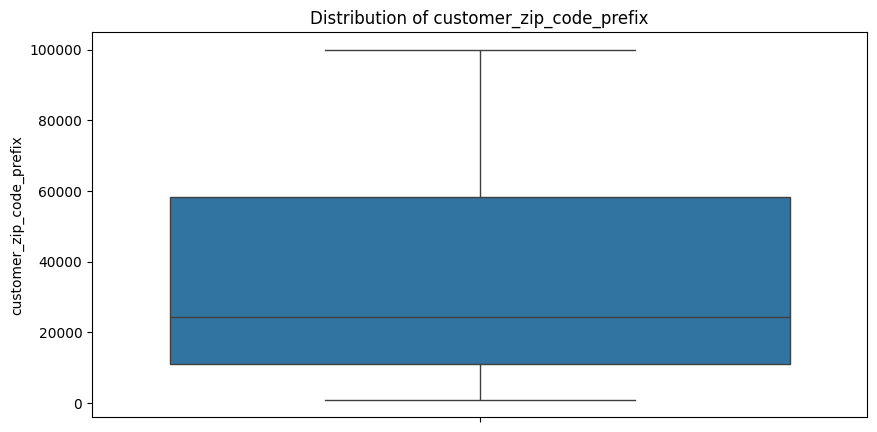

Skewness of order_item_id: 7.362892853646205
Standard deviation of order_item_id: 0.7005018501564915


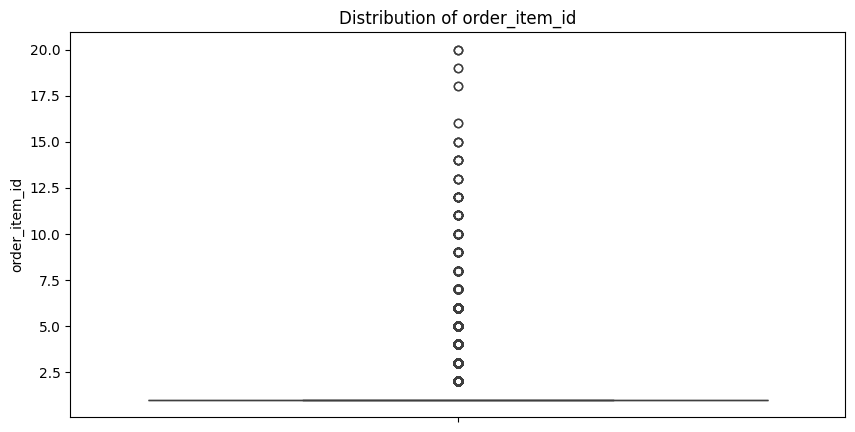

Skewness of product_name_length: -0.9131429927395786
Standard deviation of product_name_length: 10.022235677156909


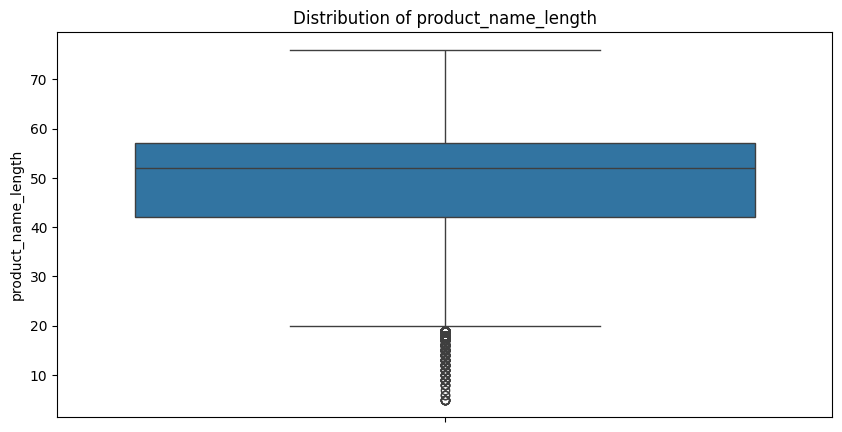

Skewness of product_description_length: 2.009668875192577
Standard deviation of product_description_length: 653.9145085442221


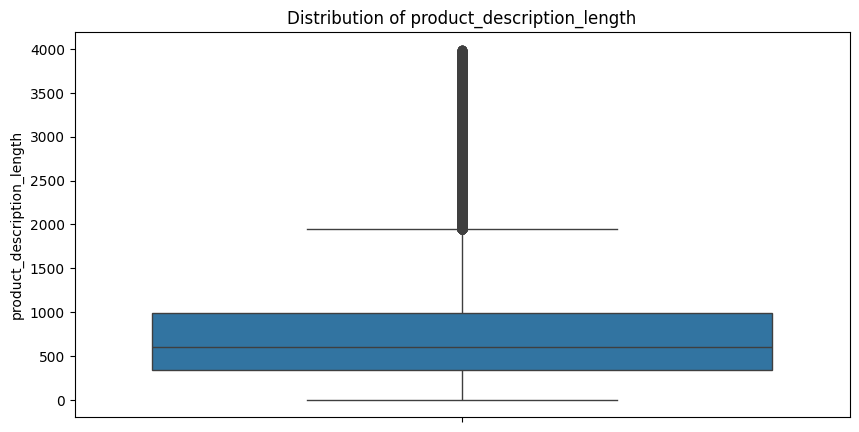

Skewness of product_photos_qty: 1.9243524180280602
Standard deviation of product_photos_qty: 1.724680390718211


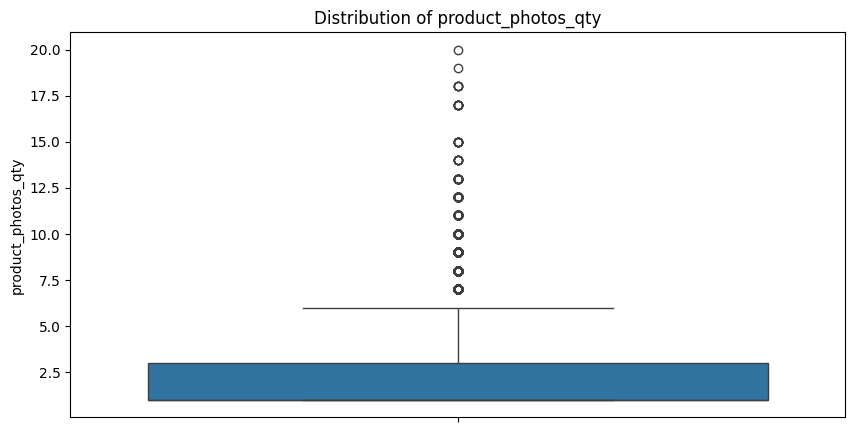

Skewness of product_weight_g: 3.643717784499081
Standard deviation of product_weight_g: 3652.8731530586406


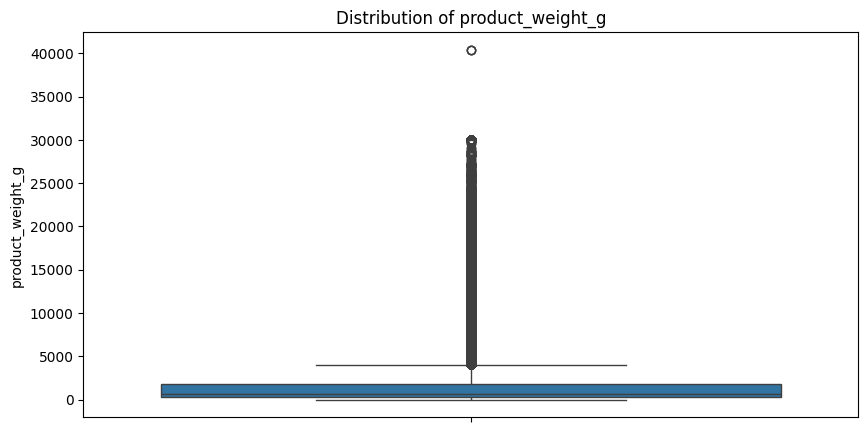

Skewness of product_length_cm: 1.765532121374384
Standard deviation of product_length_cm: 16.156526283540536


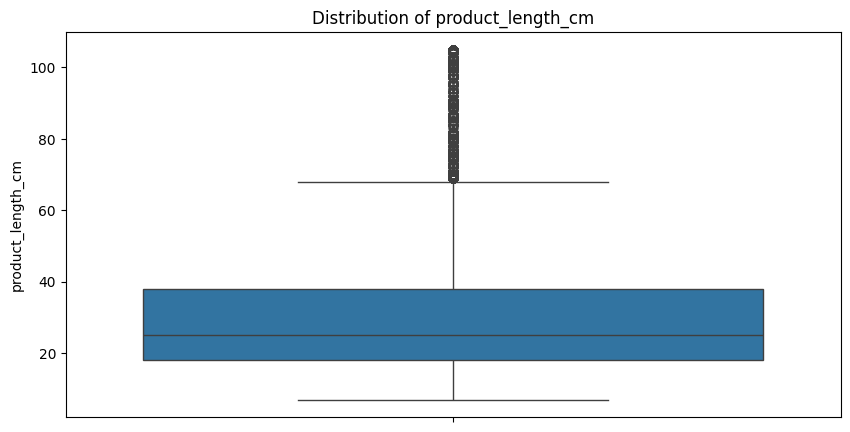

Skewness of product_height_cm: 2.240568931821448
Standard deviation of product_height_cm: 13.301354486077065


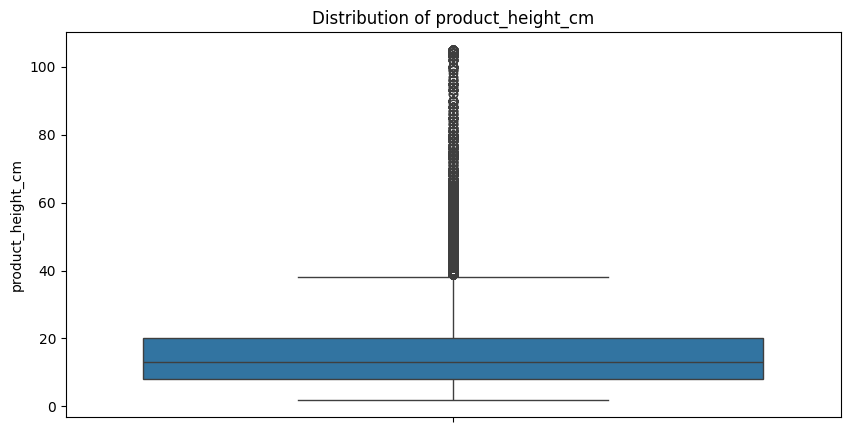

Skewness of product_width_cm: 1.741111474230417
Standard deviation of product_width_cm: 11.64683148598816


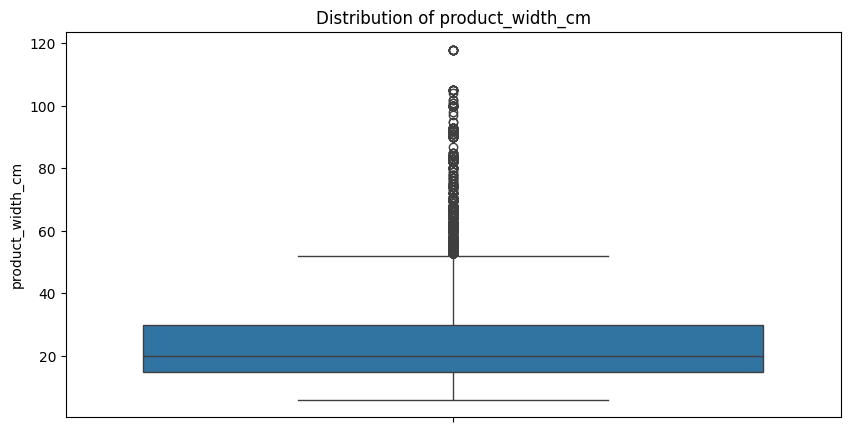

Skewness of review_score: -1.3303981609272237
Standard deviation of review_score: 1.3538293087110818


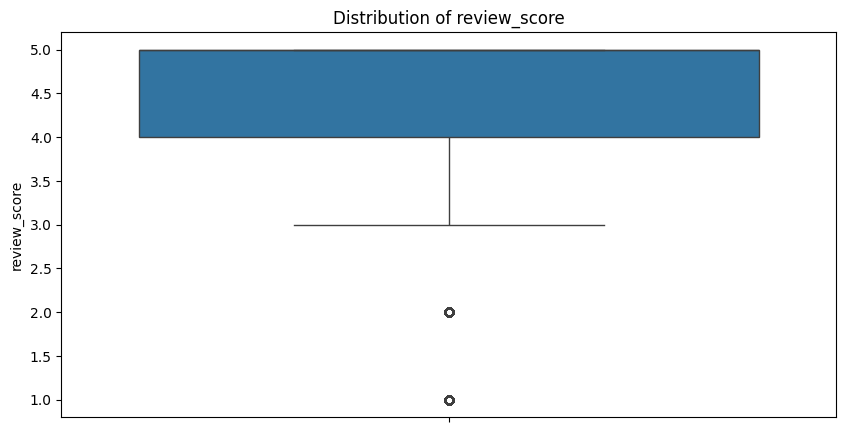

Skewness of payment_sequential: 15.523227395914436
Standard deviation of payment_sequential: 0.7021389776067443


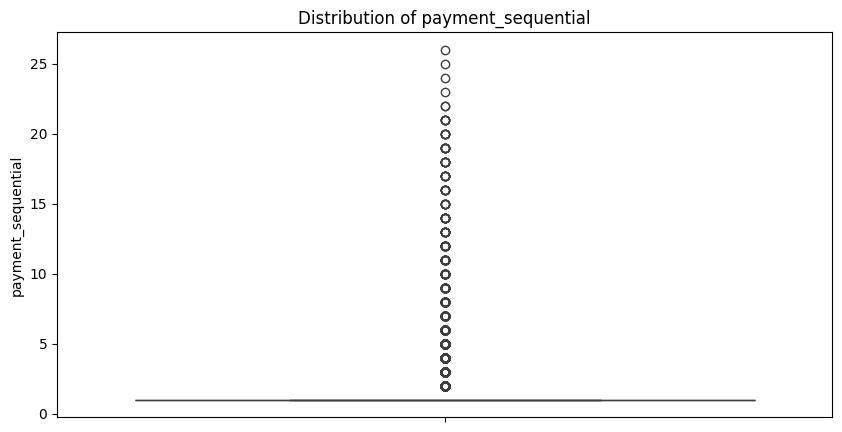

Skewness of payment_installments: 1.6392714488108935
Standard deviation of payment_installments: 2.7728126092509173


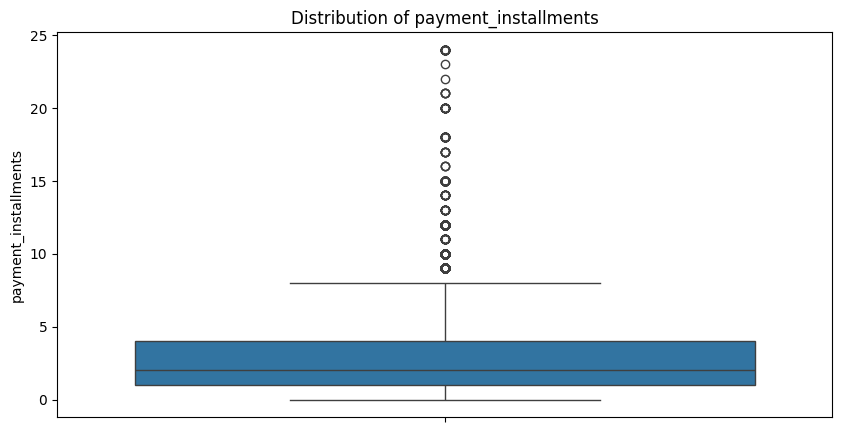

Skewness of payment_value: 14.370492271211203
Standard deviation of payment_value: 265.5235398621081


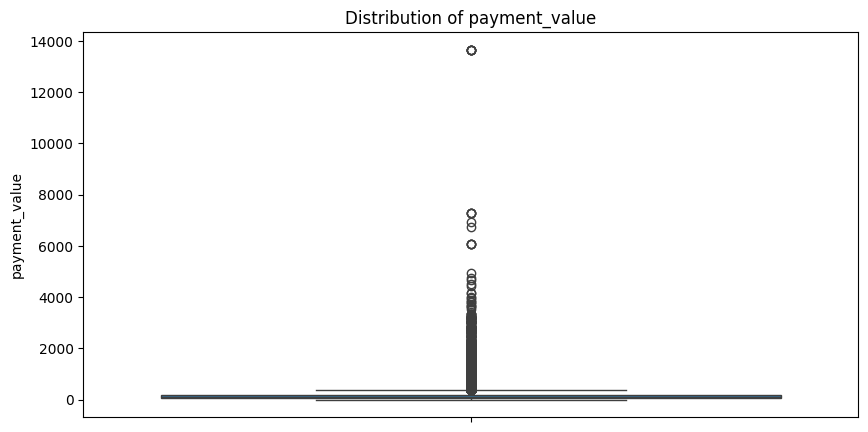

Skewness of geolocation_lat: 1.6737365158054183
Standard deviation of geolocation_lat: 5.5628423369487034


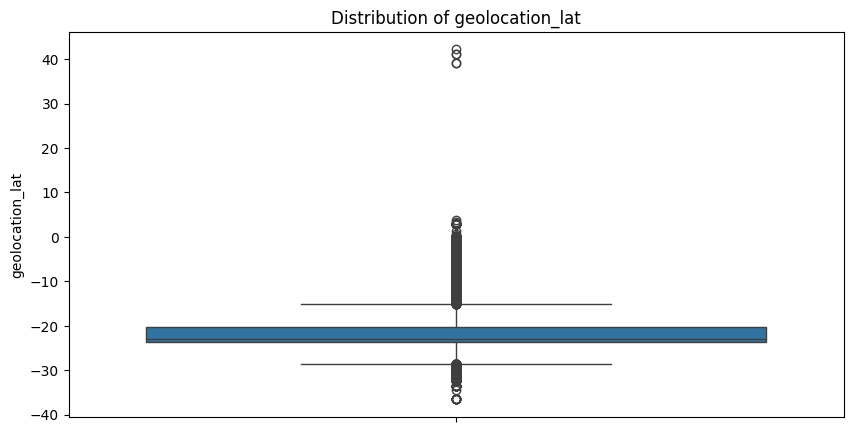

Skewness of geolocation_lng: 0.053435036521622147
Standard deviation of geolocation_lng: 4.04271124575082


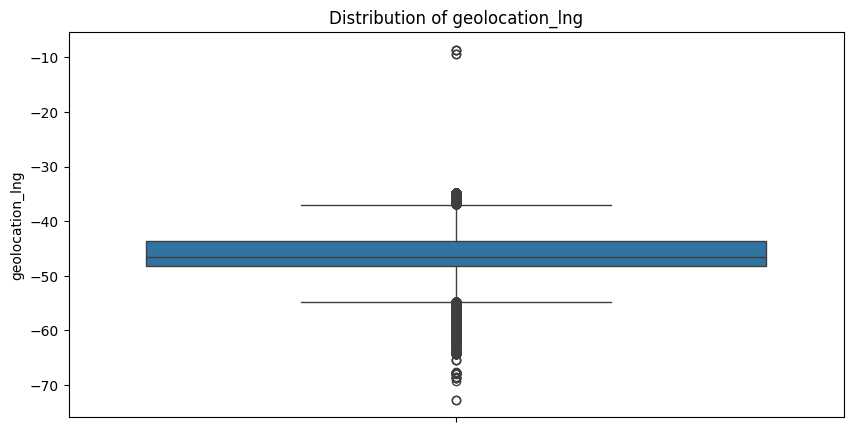

Skewness of purchased_approved: 1.6696966567846017
Standard deviation of purchased_approved: 23720.963764986012


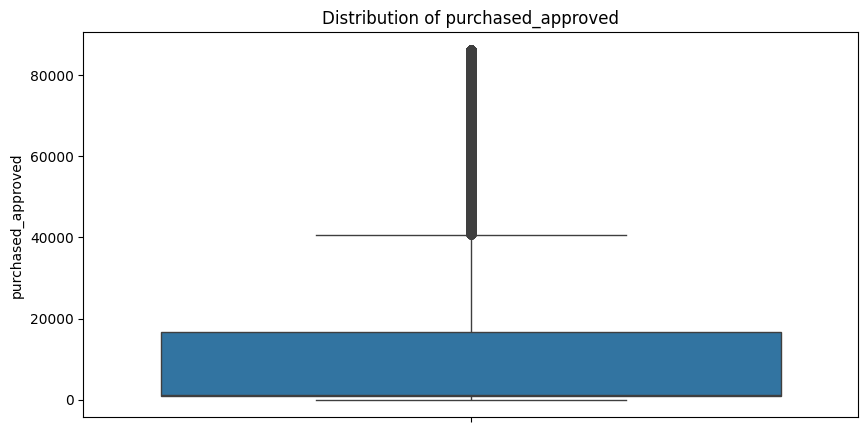

Skewness of approved_carrier: 2.8997811532142426
Standard deviation of approved_carrier: 3.5615282593079995


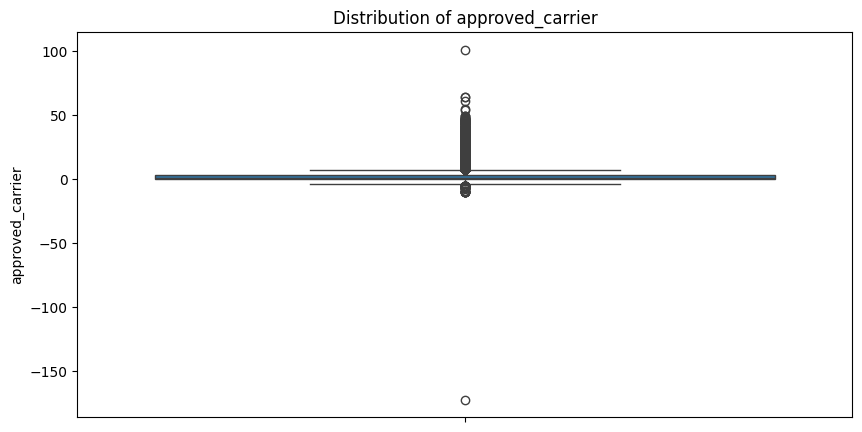

Skewness of carrier_delivered: 4.648517914974697
Standard deviation of carrier_delivered: 8.572599830321261


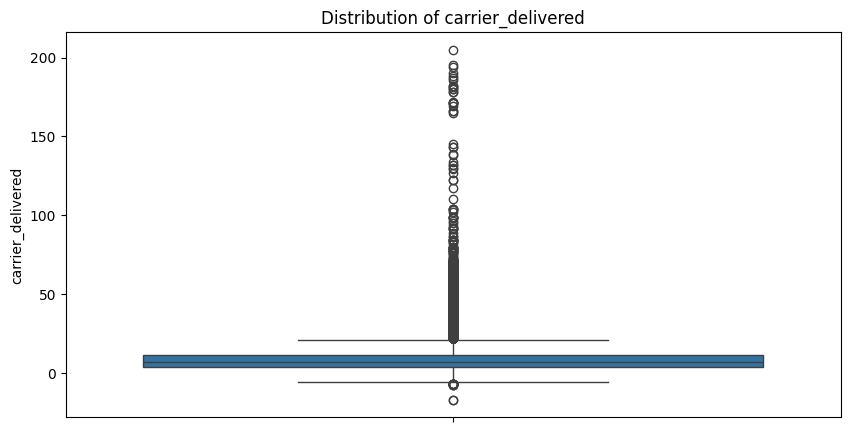

Skewness of delivered_estimated: -1.889512841800592
Standard deviation of delivered_estimated: 10.101565388681019


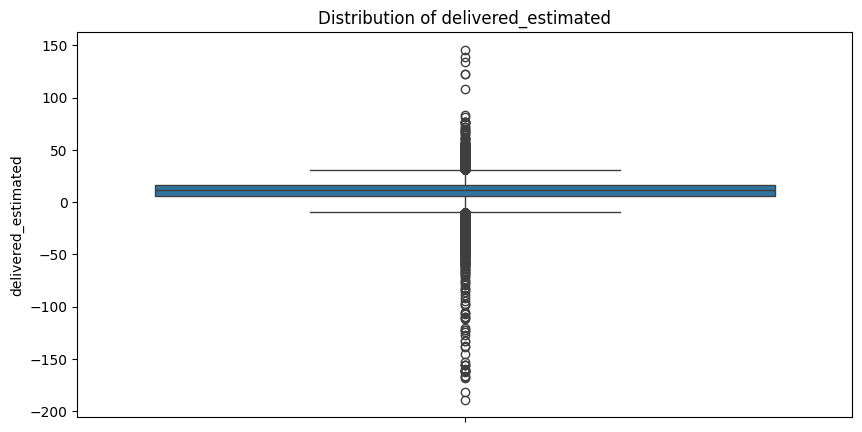

Skewness of purchased_delivered: 3.827663258283727
Standard deviation of purchased_delivered: 9.387262712339306


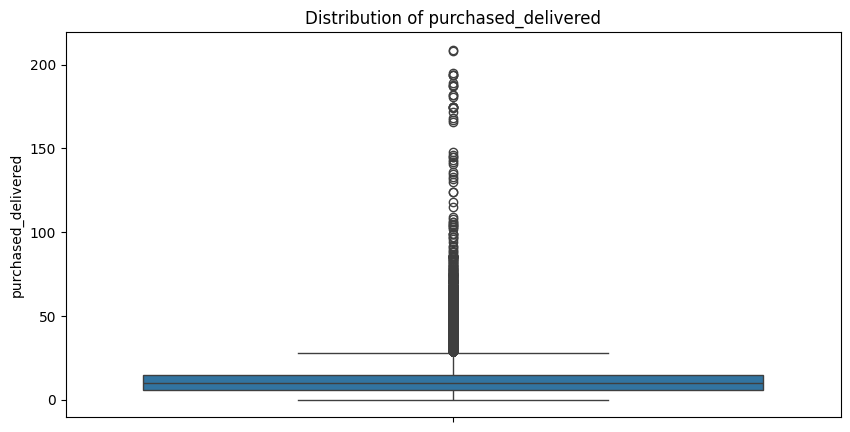

Skewness of Recency: 0.45937410657627525
Standard deviation of Recency: 152.78418473788062


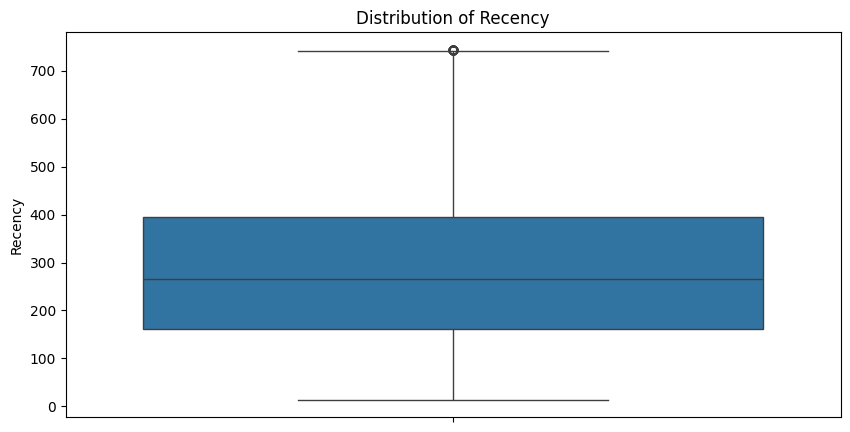

Skewness of Monetary: 29.819781710551712
Standard deviation of Monetary: 1658.4638243029246


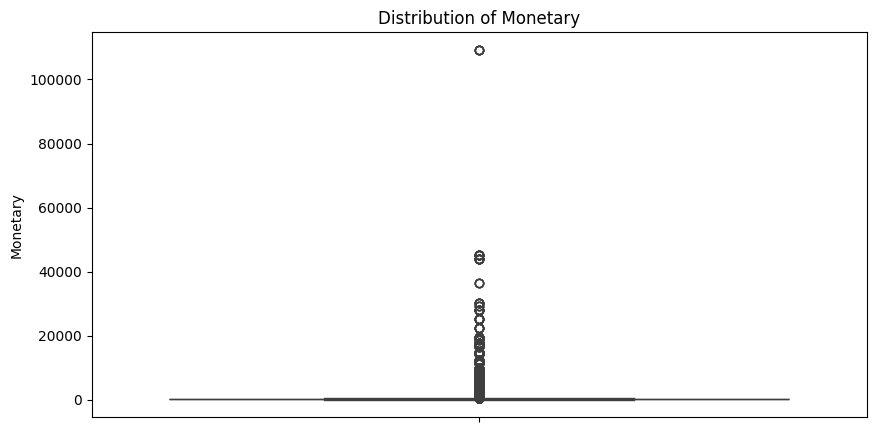

Skewness of Frequency: 13.94009549401802
Standard deviation of Frequency: 0.39389941754887486


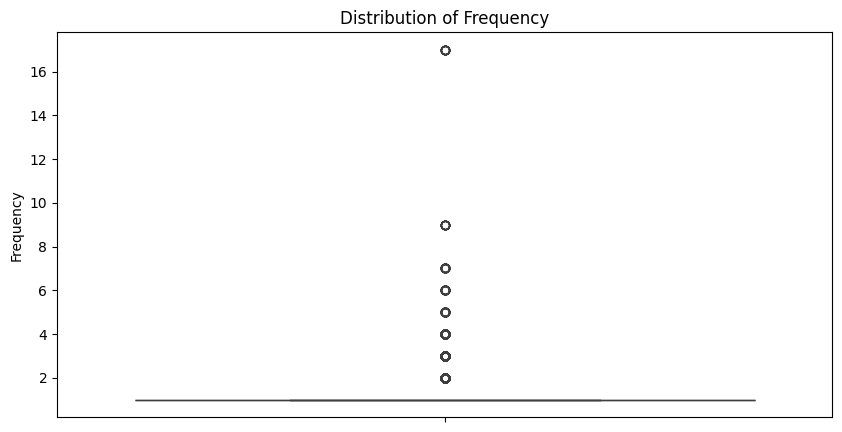

In [55]:
# Visualisasi distribusi awal dengan Boxplot
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col}: {X_train[col].skew()}')
    print(f'Standard deviation of {col}: {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [56]:
# Penanganan outlier menggunakan IQR
for col in X_train.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_train[col] = np.where(X_train[col] > upper_limit, upper_limit, X_train[col])
    X_train[col] = np.where(X_train[col] < lower_limit, lower_limit, X_train[col])


In [57]:
for col in X_test.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)  # Gunakan nilai dari X_train
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_test[col] = np.where(X_test[col] > upper_limit, upper_limit, X_test[col])
    X_test[col] = np.where(X_test[col] < lower_limit, lower_limit, X_test[col])


## Drop Feature

In [58]:
# Kolom yang ingin dihapus
columns_to_drop = ['customer_zip_code_prefix', 'order_item_id', 'Frequency', 'payment_sequential','order_id', 'customer_id', 'customer_unique_id','product_id','order_purchase_timestamp','order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','seller_id','review_id','review_answer_timestamp','review_creation_date','order_approved_at','geolocation_state','geolocation_city']

# Drop kolom pada X_train dan X_test
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Konfirmasi hasil
print("Kolom yang tersisa di X_train:")
print(X_train.columns)

print("\nKolom yang tersisa di X_test:")
print(X_test.columns)


Kolom yang tersisa di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'payment_installments', 'payment_value', 'geolocation_lat',
       'geolocation_lng', 'purchased_approved', 'approved_carrier',
       'carrier_delivered', 'delivered_estimated', 'purchased_delivered',
       'Recency', 'Monetary'],
      dtype='object')

Kolom yang tersisa di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'paymen

Skewness of product_name_length (after outlier treatment): -0.871006272848564
Standard deviation of product_name_length (after outlier treatment): 9.953887527411291


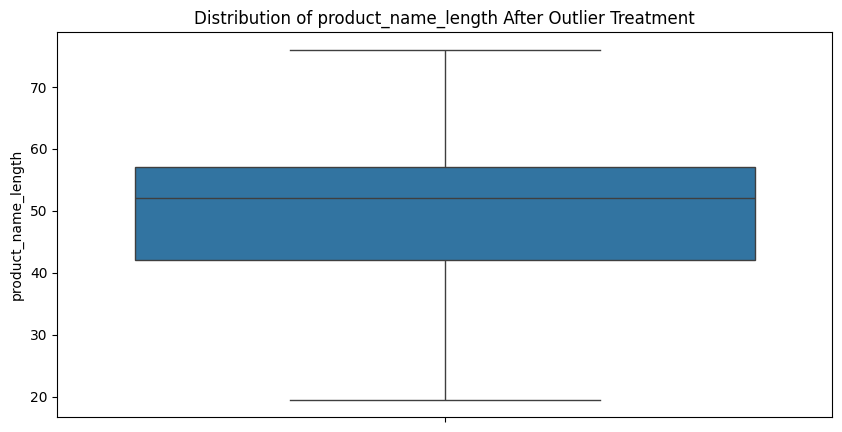

Skewness of product_description_length (after outlier treatment): 1.004371332945647
Standard deviation of product_description_length (after outlier treatment): 511.81506940415846


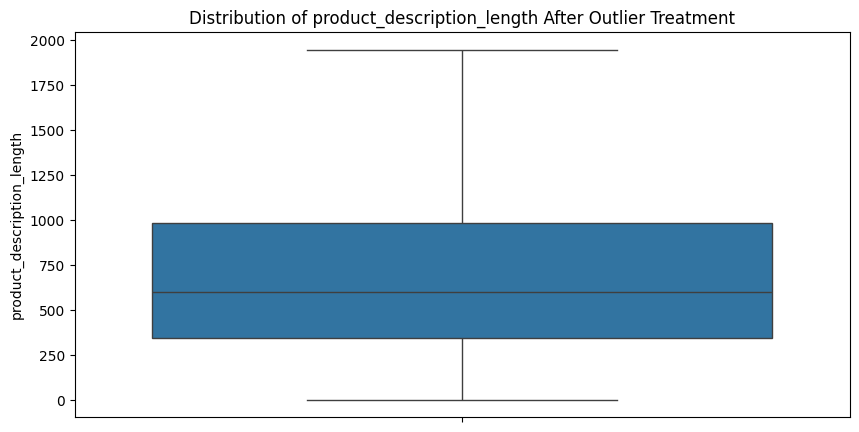

Skewness of product_photos_qty (after outlier treatment): 1.2534189329112357
Standard deviation of product_photos_qty (after outlier treatment): 1.5234963498101715


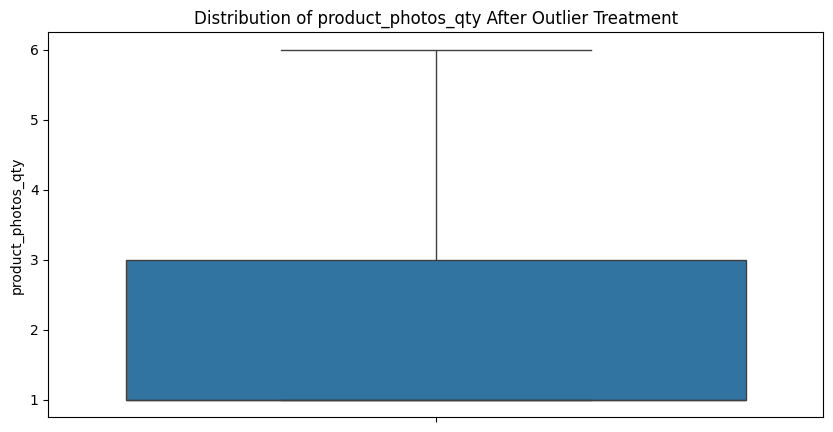

Skewness of product_weight_g (after outlier treatment): 1.1490232239804896
Standard deviation of product_weight_g (after outlier treatment): 1342.2024585152728


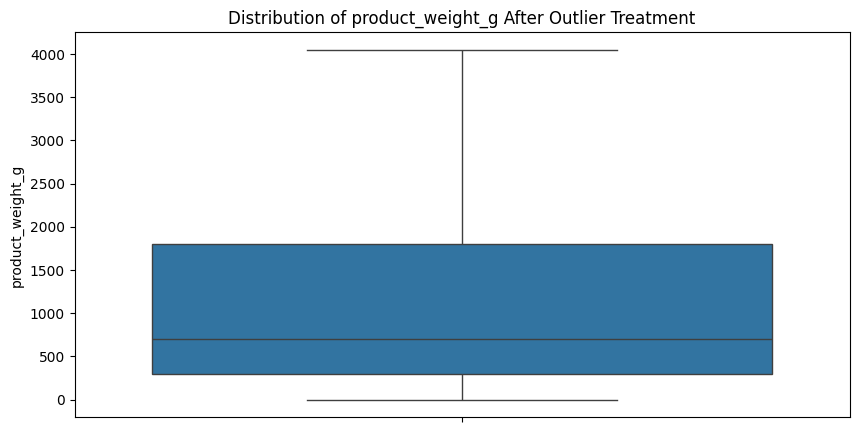

Skewness of product_length_cm (after outlier treatment): 1.1326084509456988
Standard deviation of product_length_cm (after outlier treatment): 14.302417720956779


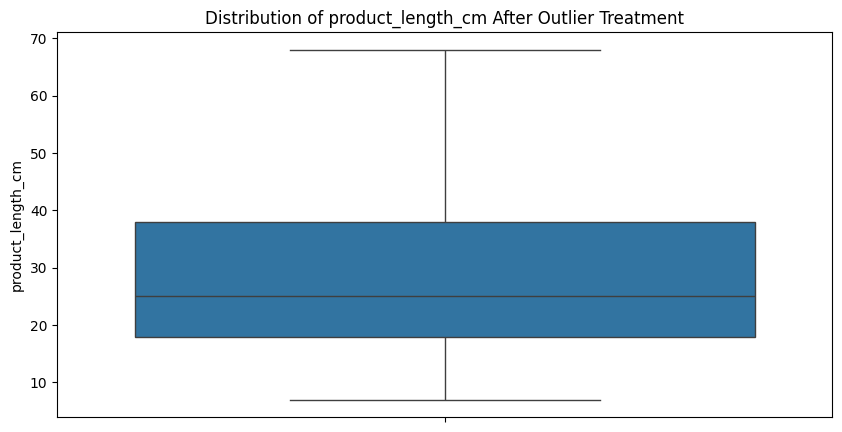

Skewness of product_height_cm (after outlier treatment): 0.8561223364756406
Standard deviation of product_height_cm (after outlier treatment): 9.91106456037038


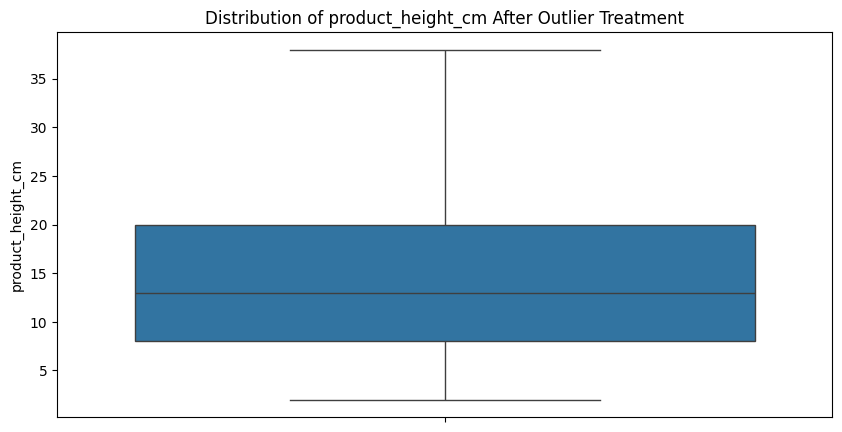

Skewness of product_width_cm (after outlier treatment): 1.0364333323539343
Standard deviation of product_width_cm (after outlier treatment): 10.562649332943224


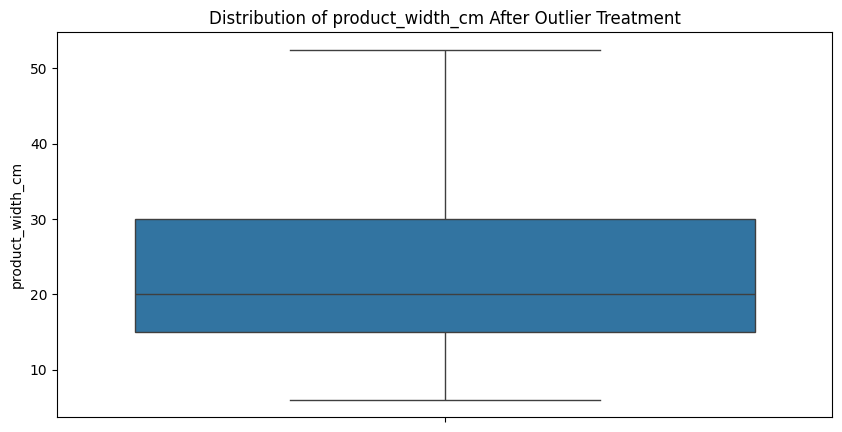

Skewness of review_score (after outlier treatment): -0.8548692631935951
Standard deviation of review_score (after outlier treatment): 0.9625302349761551


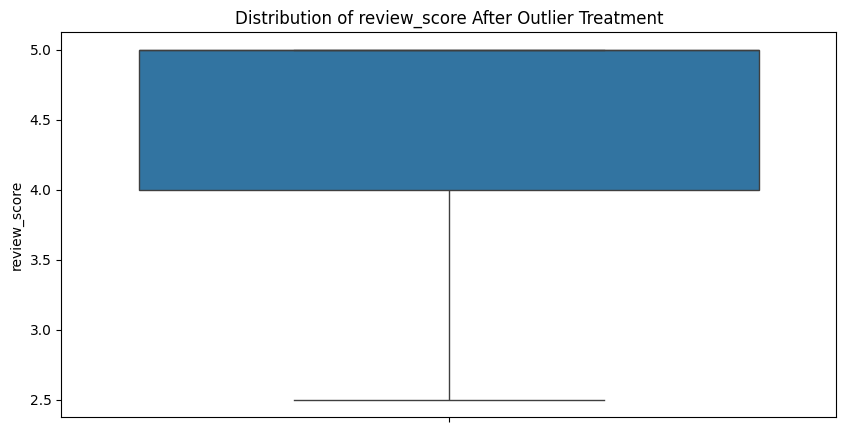

Skewness of payment_installments (after outlier treatment): 1.2243278126860828
Standard deviation of payment_installments (after outlier treatment): 2.4641936584019137


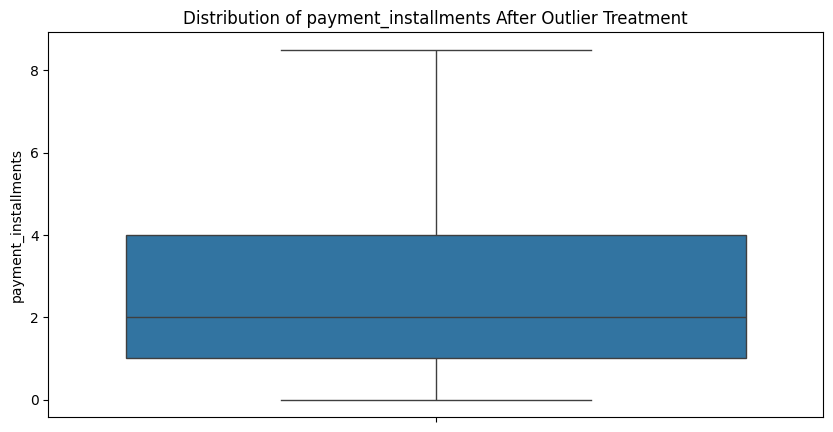

Skewness of payment_value (after outlier treatment): 1.061727690599774
Standard deviation of payment_value (after outlier treatment): 104.64727146542663


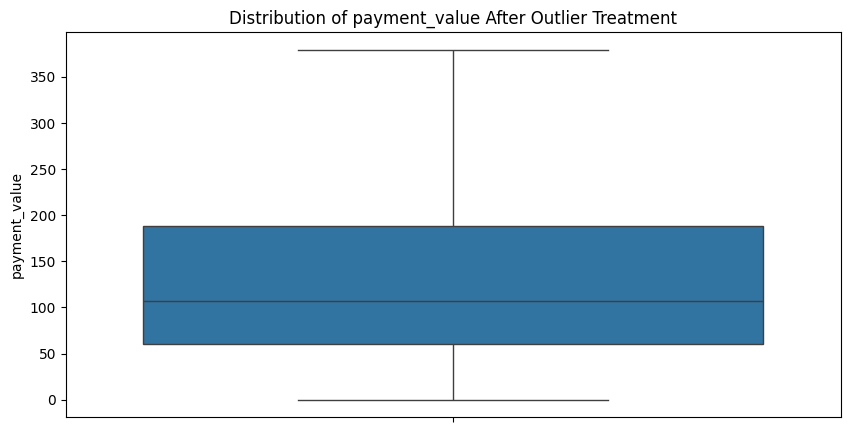

Skewness of geolocation_lat (after outlier treatment): 0.5176366911996901
Standard deviation of geolocation_lat (after outlier treatment): 3.553840313349853


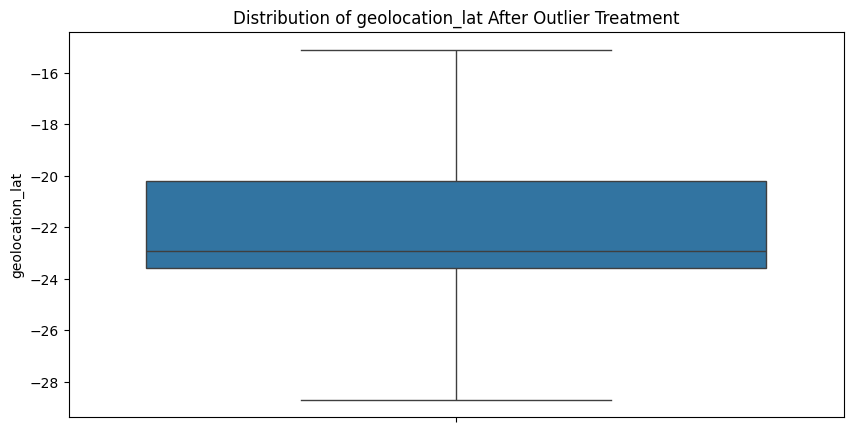

Skewness of geolocation_lng (after outlier treatment): 0.2563319263239406
Standard deviation of geolocation_lng (after outlier treatment): 3.7510690735300467


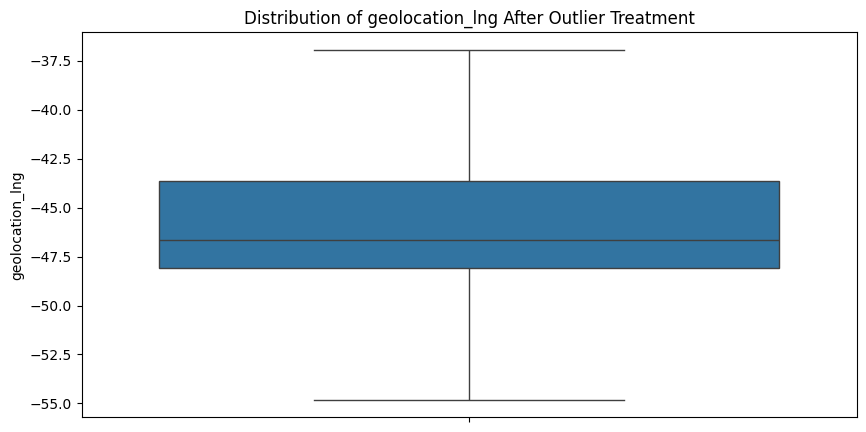

Skewness of purchased_approved (after outlier treatment): 1.217014587832873
Standard deviation of purchased_approved (after outlier treatment): 15710.208047711354


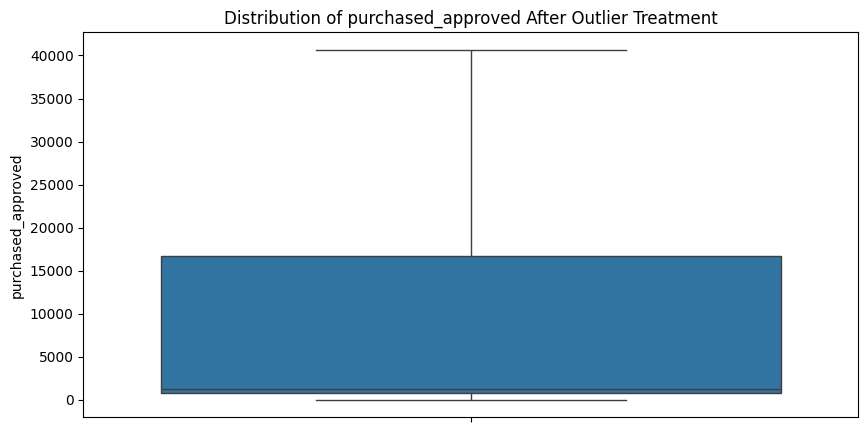

Skewness of approved_carrier (after outlier treatment): 1.0284622777010002
Standard deviation of approved_carrier (after outlier treatment): 2.2216448784617486


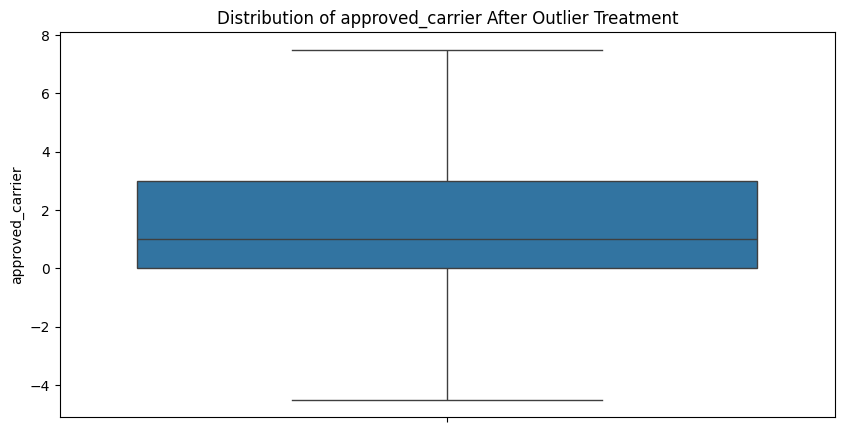

Skewness of carrier_delivered (after outlier treatment): 0.8551274778732526
Standard deviation of carrier_delivered (after outlier treatment): 5.910586949366766


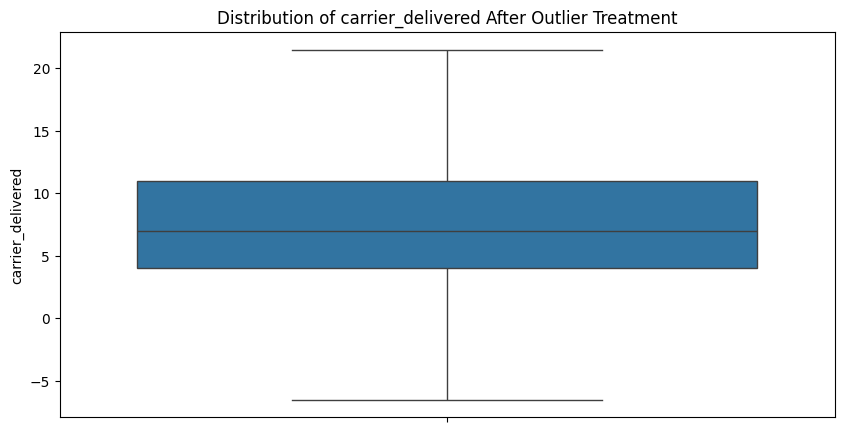

Skewness of delivered_estimated (after outlier treatment): -0.08817534036270128
Standard deviation of delivered_estimated (after outlier treatment): 8.25669795831473


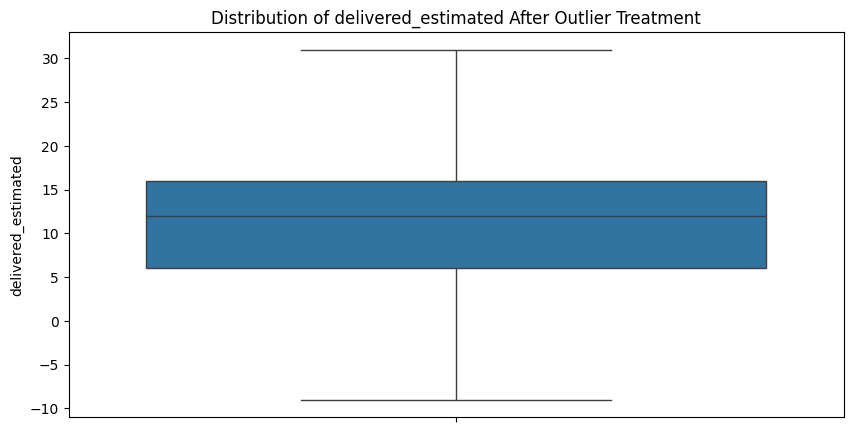

Skewness of purchased_delivered (after outlier treatment): 0.8895444289016848
Standard deviation of purchased_delivered (after outlier treatment): 7.06369141823012


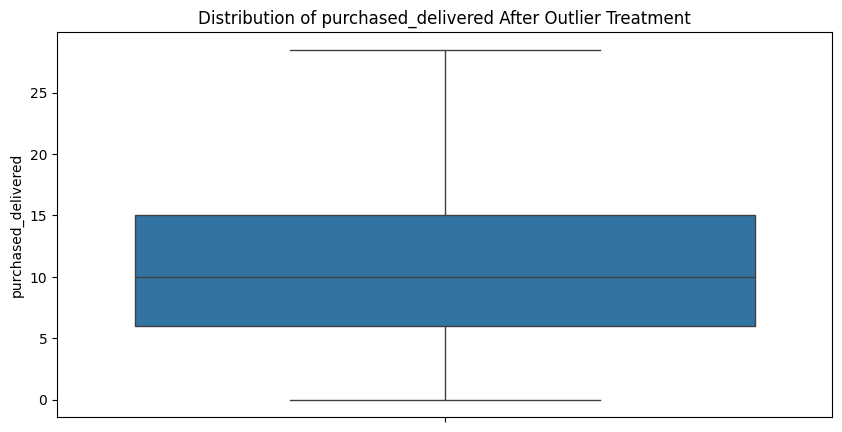

Skewness of Recency (after outlier treatment): 0.45927688262157945
Standard deviation of Recency (after outlier treatment): 152.78192959487868


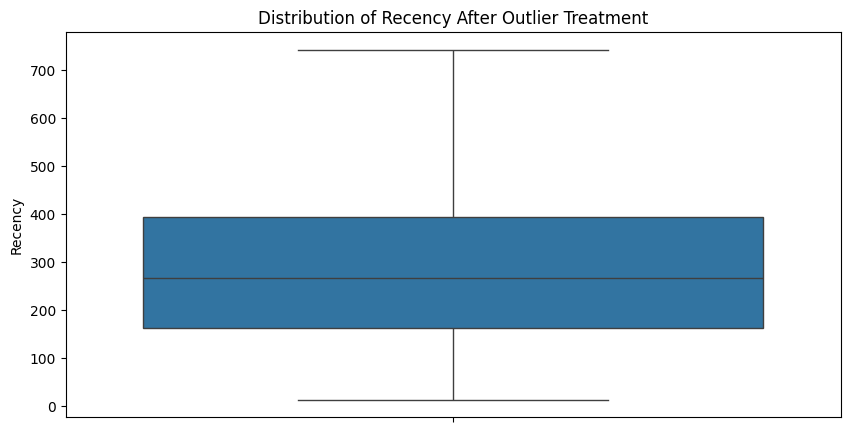

Skewness of Monetary (after outlier treatment): 1.1458768854216685
Standard deviation of Monetary (after outlier treatment): 179.2138076497415


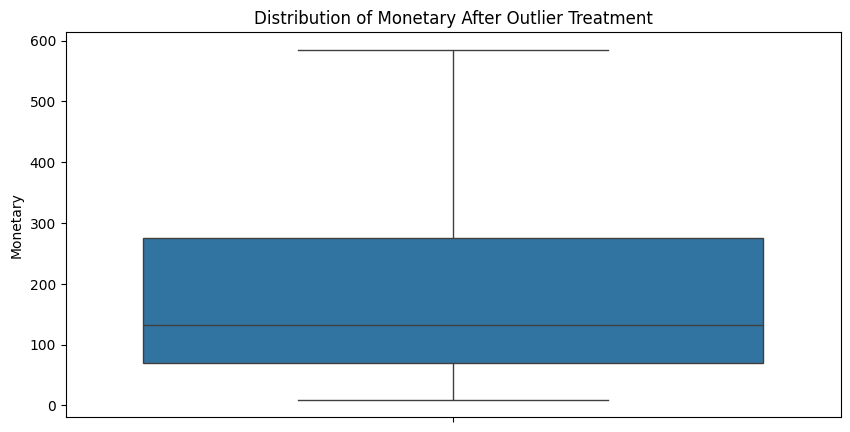

In [59]:
# Visualisasi distribusi setelah penanganan outlier
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col} (after outlier treatment): {X_train[col].skew()}')
    print(f'Standard deviation of {col} (after outlier treatment): {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col} After Outlier Treatment')
    plt.show()

In [60]:
X_train.shape

(88815, 26)

The outliers are treated by the method of capping.
Values which fall outside of the upper and lower whisker are capped to the upper and lower whisker values respectively.
Since dropping the values would lead to loss of huge volumes of data, we prefer to cap the values.

## Correlation Matrix of Numerical Variables

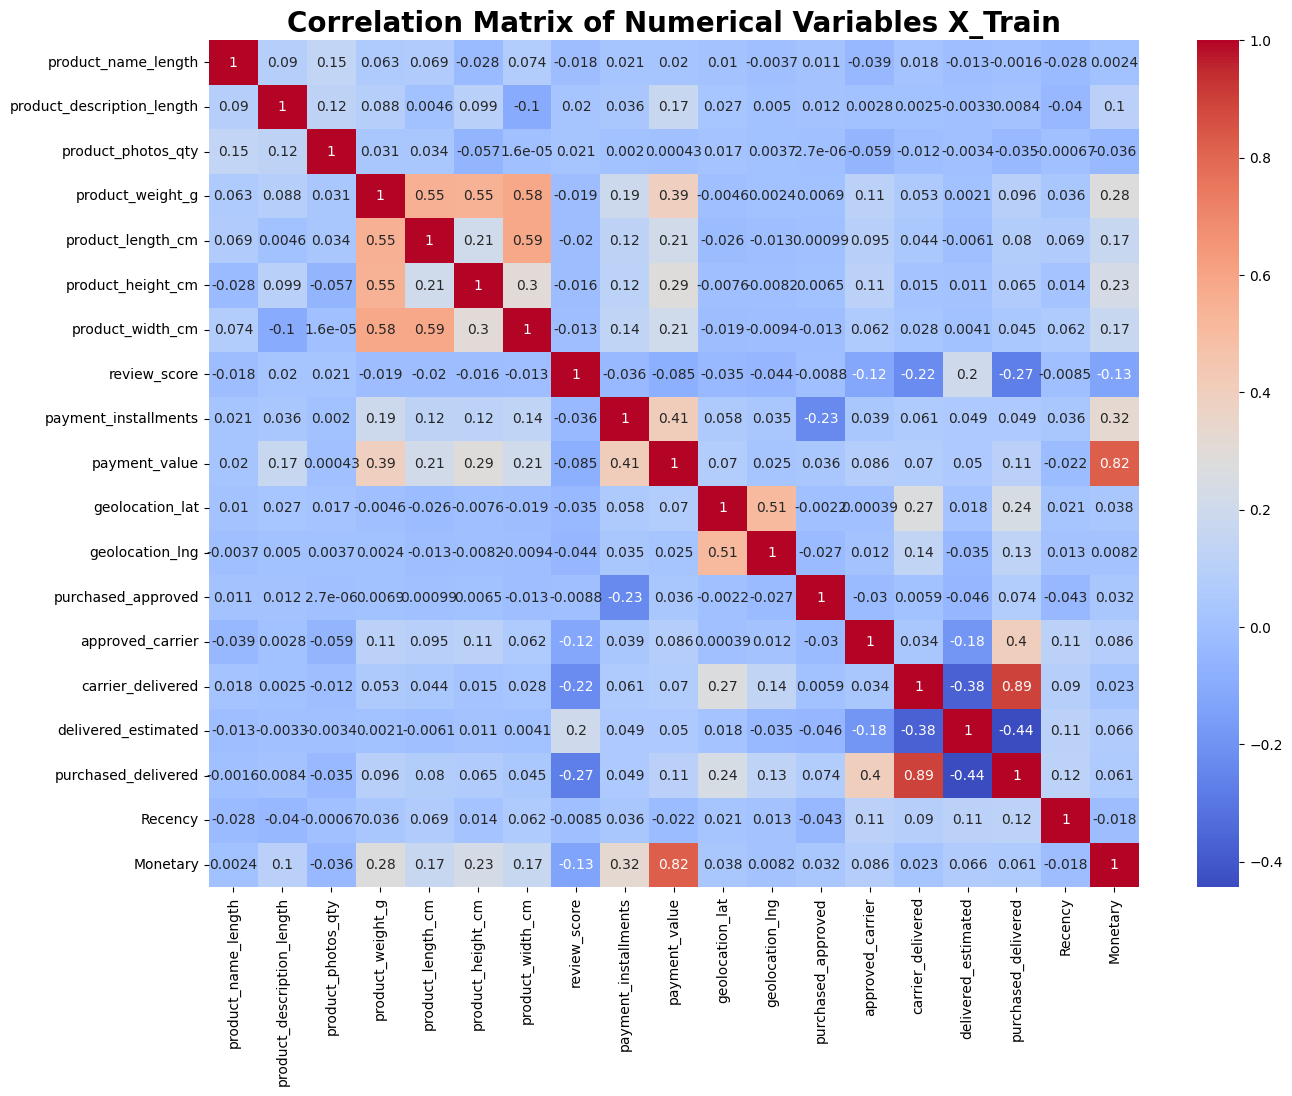

In [61]:
# Memilih hanya kolom numerik dari DataFrame
numerical_data = X_train.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(15, 11))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables X_Train', fontsize=20, fontweight='bold')
plt.show()

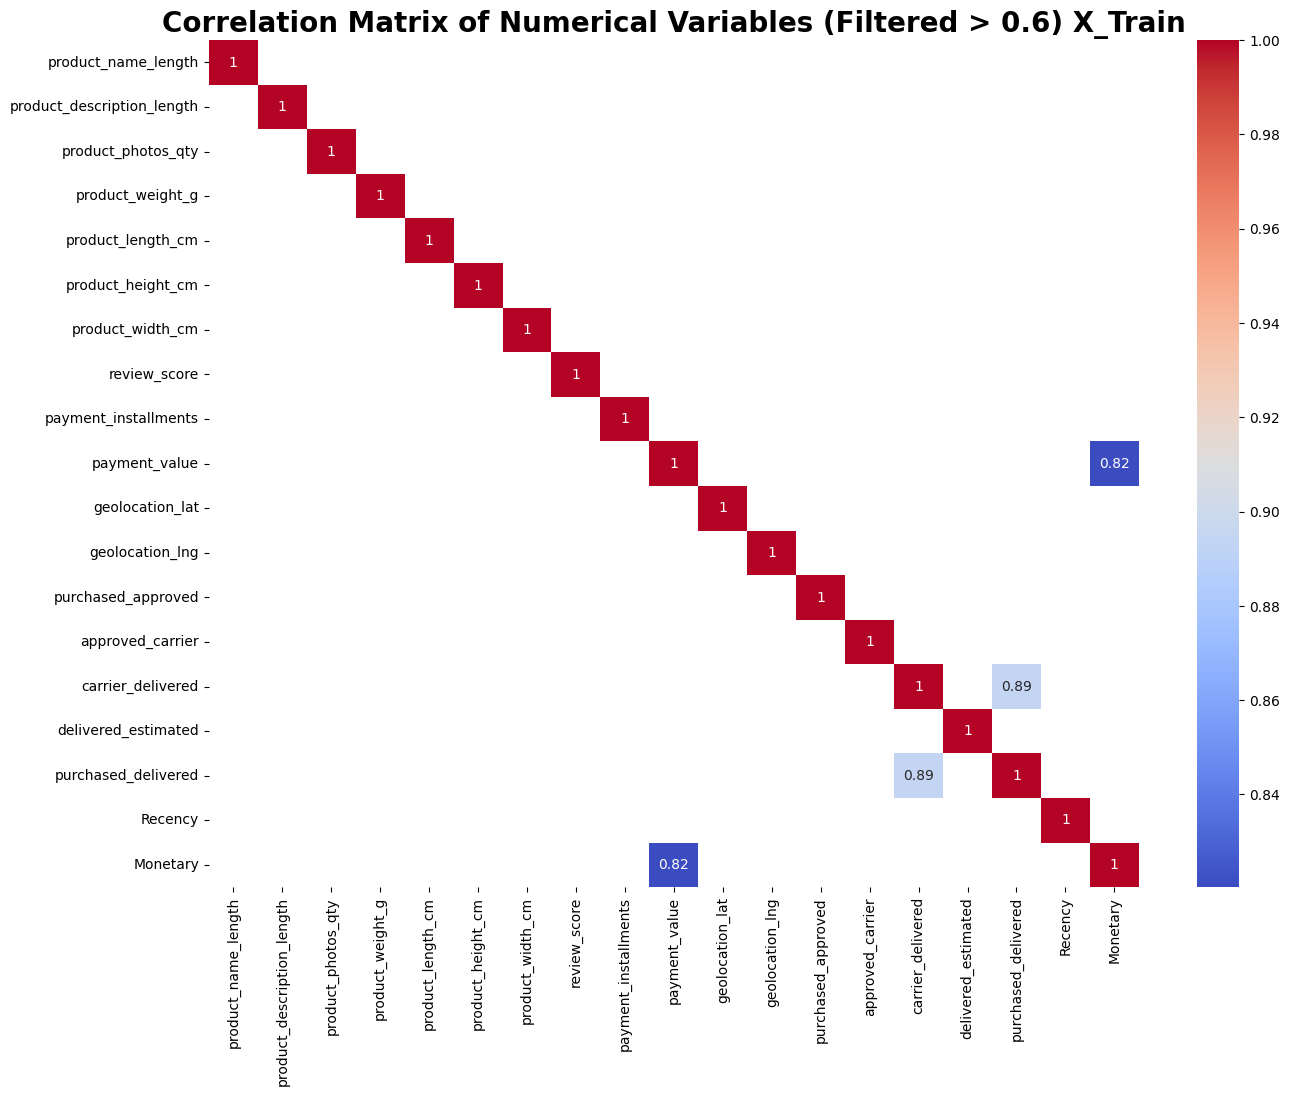

In [62]:
# Memilih hanya kolom numerik
numerical_data = X_train.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Memfilter nilai korelasi > 0.6 (selain diagonal 1.0)
filtered_corr = correlation_matrix.where(correlation_matrix > 0.6)

# Plot heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=filtered_corr.isnull())
plt.title('Correlation Matrix of Numerical Variables (Filtered > 0.6) X_Train', fontsize=20, fontweight='bold')
plt.show()


In [63]:
X_train

customer_city  customer_state order_status product_category_name  \
65071   Akkarampalle  Andhra Pradesh    delivered            Housewares   
2818      Poolambadi      Tamil Nadu    delivered       Fixed_Telephony   
105987  Akkarampalle  Andhra Pradesh    delivered      Office_Furniture   
62668        Isnapur  Andhra Pradesh    delivered                  Toys   
67233    Bheemavaram  Andhra Pradesh    delivered        Sports_Leisure   
...              ...             ...          ...                   ...   
38163     Khambhalia         Gujarat    delivered        Bed_Bath_Table   
17812   Akkarampalle  Andhra Pradesh    delivered       Furniture_Decor   
14546   Akkarampalle  Andhra Pradesh    delivered        Bed_Bath_Table   
40033   Akkarampalle  Andhra Pradesh    delivered        Bed_Bath_Table   
104110        Bawana           Delhi    delivered            Stationery   

        product_name_length  product_description_length  product_photos_qty  \
65071             34.000000                  767.000000            2.000000   
2818              46.000000                  218.000000            4.000000   
105987            19.500000                  883.000000            1.000000   
62668             53.000000                  650.000000            2.000000   
67233             36.000000                 1947.500000            1.000000   
...                     ...                         ...                 ...   
38163             39.000000                  161.000000            2.000000   
17812             44.000000                  903.000000            6.000000   
14546             40.000000                  207.000000            1.000000   
40033             54.000000                  229.000000            1.000000   
104110            57.000000                  396.000000            3.000000   

        product_weight_g  product_length_cm  product_height_cm  \
65071        4050.000000          29.000000          28.000000   
2818          150.000000          16.000000           4.000000   
105987       4050.000000          55.000000          38.000000   
62668         600.000000          40.000000          20.000000   
67233         150.000000          16.000000          16.000000   
...                  ...                ...                ...   
38163         350.000000          25.000000           8.000000   
17812        2600.000000          50.000000          10.000000   
14546         700.000000          35.000000           7.000000   
40033        1150.000000          40.000000           5.000000   
104110       4050.000000          38.000000          30.000000   

        product_width_cm   seller_city    seller_state  review_score  \
65071          23.000000         Adoni  Andhra Pradesh      4.000000   
2818           11.000000  Akkarampalle  Andhra Pradesh      5.000000   
105987         26.000000    Vijayawada  Andhra Pradesh      5.000000   
62668          30.000000    Khilchipur  Madhya Pradesh      4.000000   
67233          11.000000  Akkarampalle  Andhra Pradesh      5.000000   
...                  ...           ...             ...           ...   
38163          19.000000       Tarsali         Gujarat      4.000000   
17812          30.000000  Akkarampalle  Andhra Pradesh      5.000000   
14546          27.000000       Tarsali         Gujarat      3.000000   
40033          29.000000       Tarsali         Gujarat      5.000000   
104110         28.000000     Vicarabad  Andhra Pradesh      3.000000   

       payment_type  payment_installments  payment_value  geolocation_lat  \
65071   credit_card              2.000000      57.510000       -23.616209   
2818    credit_card              3.000000      35.090000       -28.687549   
105987          UPI              1.000000     279.570000       -23.519833   
62668   credit_card              8.500000     107.190000       -15.097289   
67233   credit_card              2.000000      67.290000       -23.629364   
...             ...                  

## Normalisasi

In [64]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.871006
product_description_length    1.004371
product_photos_qty            1.253419
product_weight_g              1.149023
product_length_cm             1.132608
product_height_cm             0.856122
product_width_cm              1.036433
review_score                 -0.854869
payment_installments          1.224328
payment_value                 1.061728
geolocation_lat               0.517637
geolocation_lng               0.256332
purchased_approved            1.217015
approved_carrier              1.028462
carrier_delivered             0.855127
delivered_estimated          -0.088175
purchased_delivered           0.889544
Recency                       0.459277
Monetary                      1.145877
dtype: float64

Skewness for X_test:
product_name_length          -0.861331
product_description_length    1.018097
product_photos_qty            1.243952
product_weight_g              1.163505
product_length_cm             1.138524
produ

Jika skewness mendekati 0, distribusi data dianggap simetris atau mendekati normal.
Jika skewness positif, data miring ke kanan (tail kanan lebih panjang).
Jika skewness negatif, data miring ke kiri (tail kiri lebih panjang).

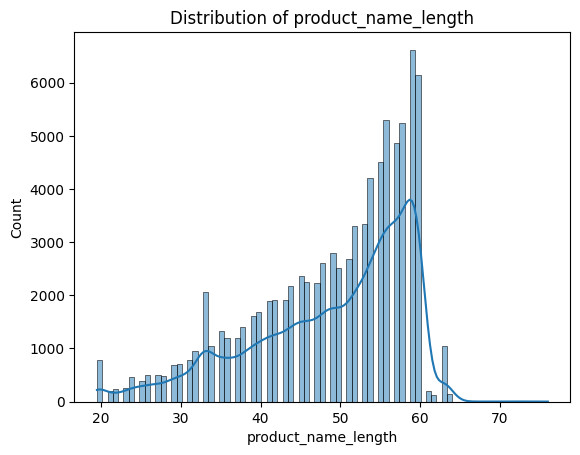

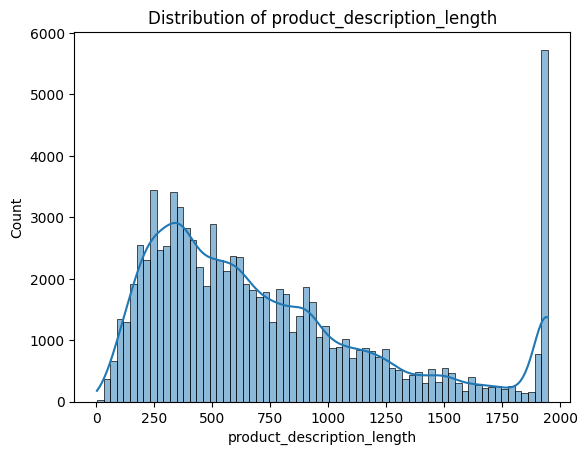

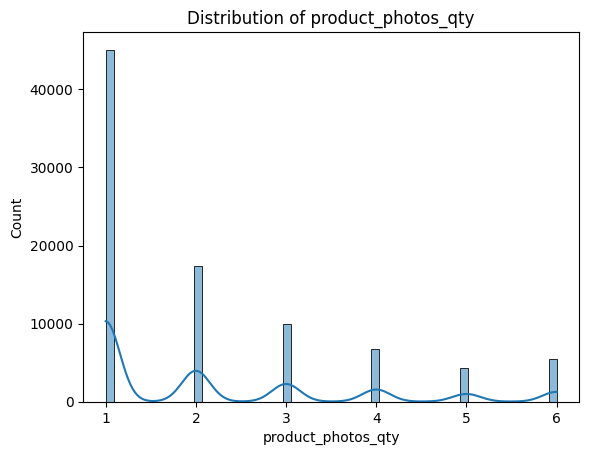

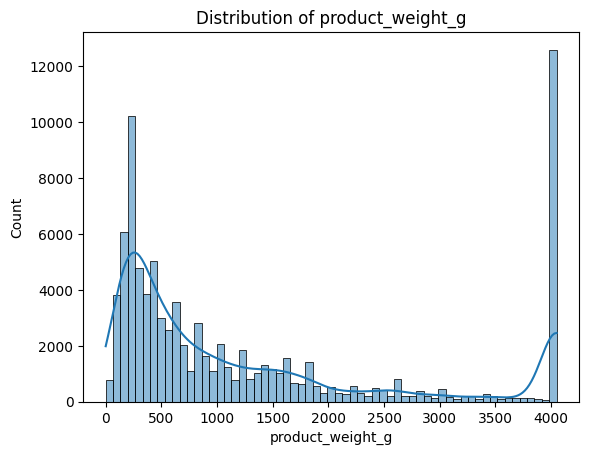

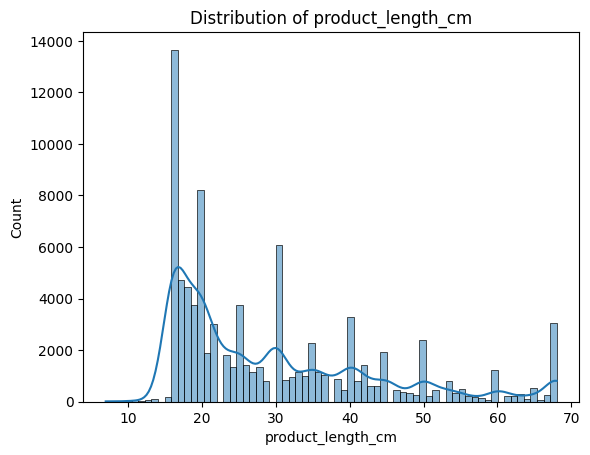

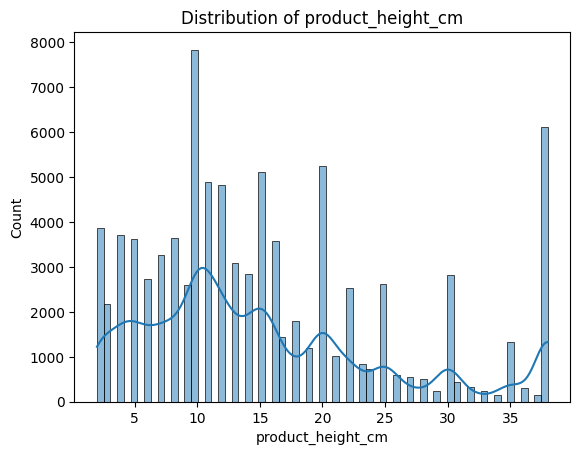

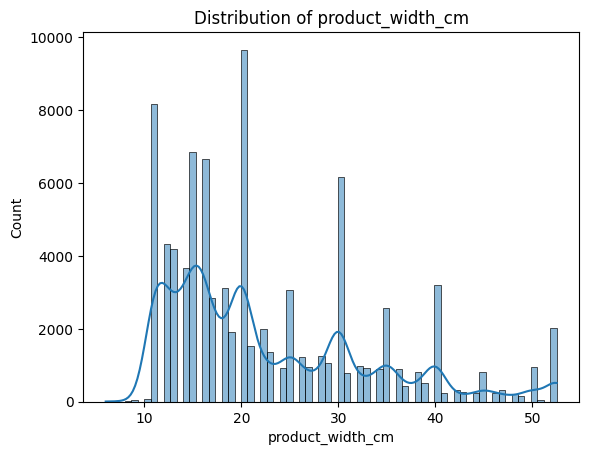

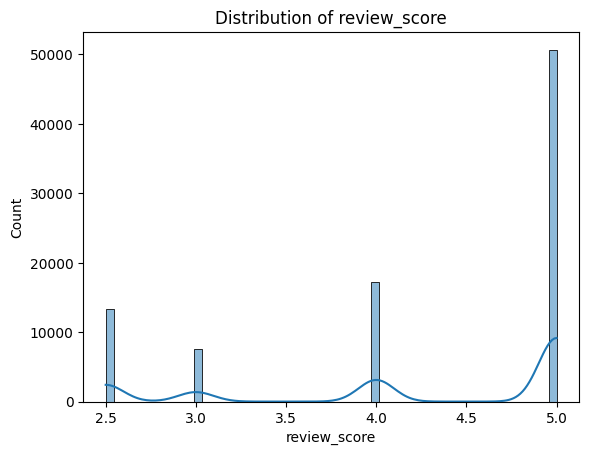

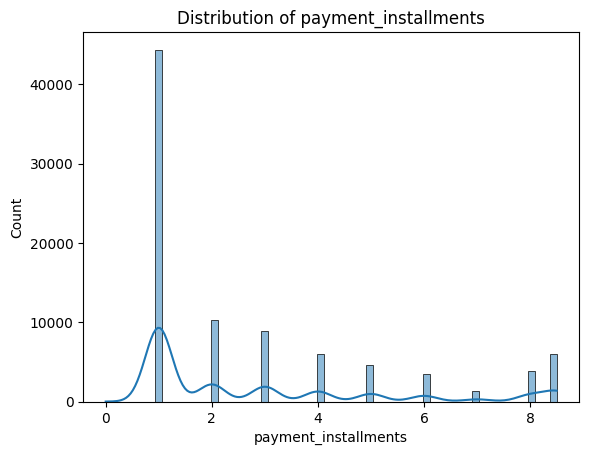

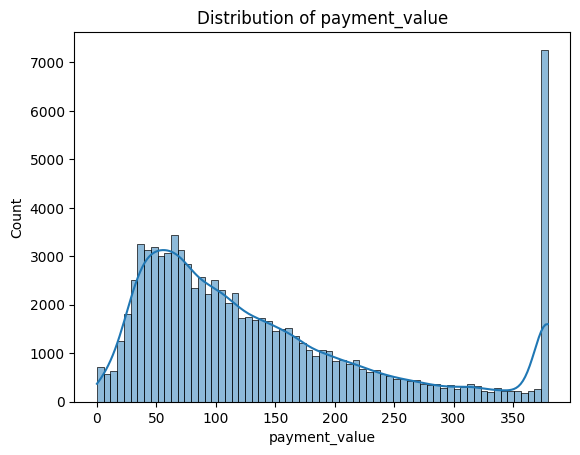

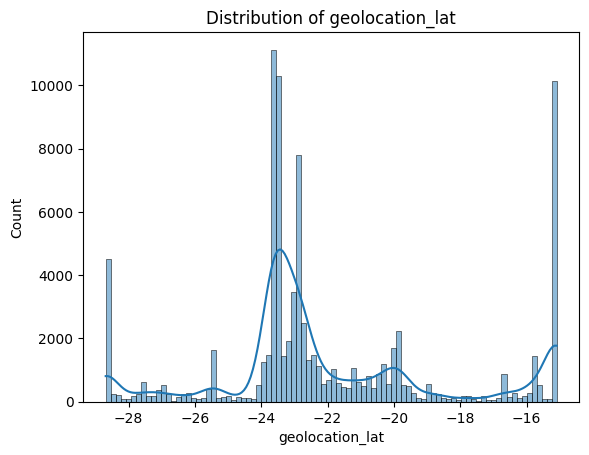

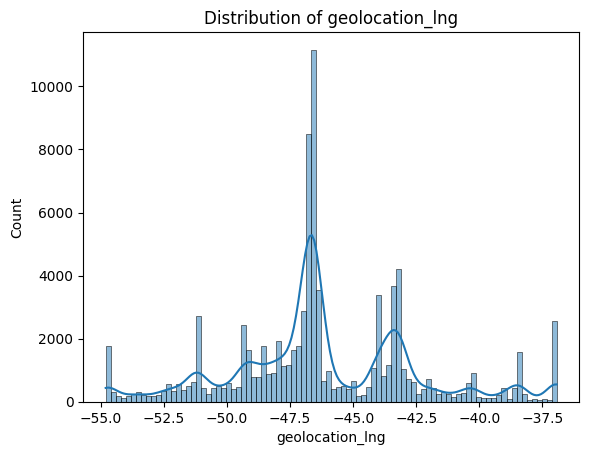

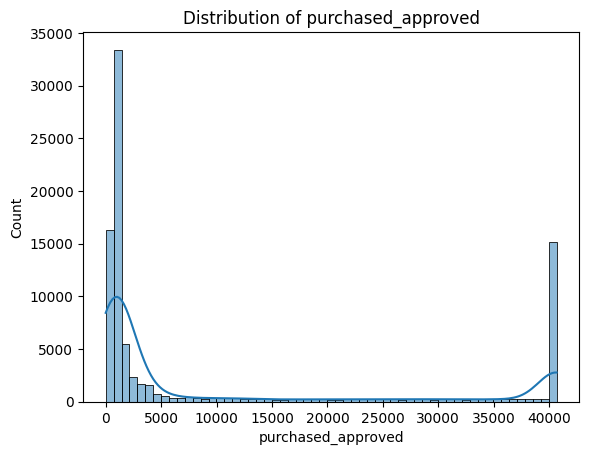

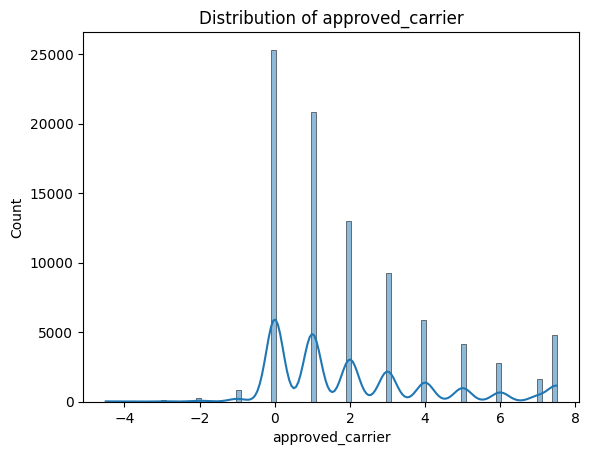

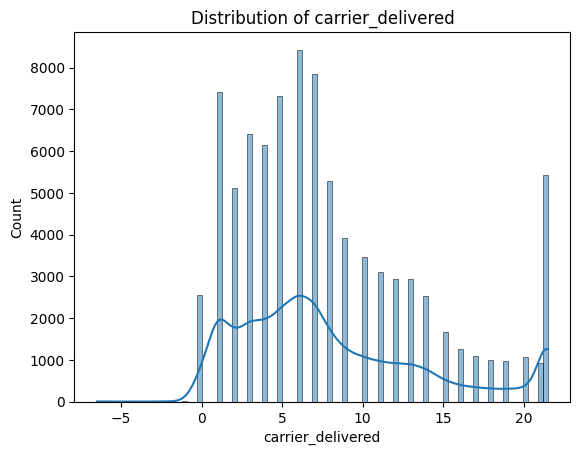

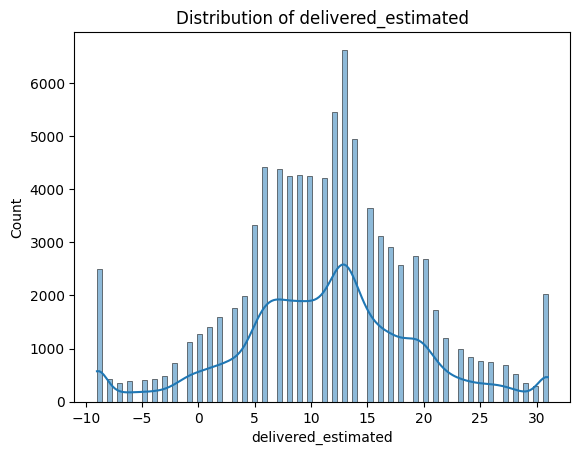

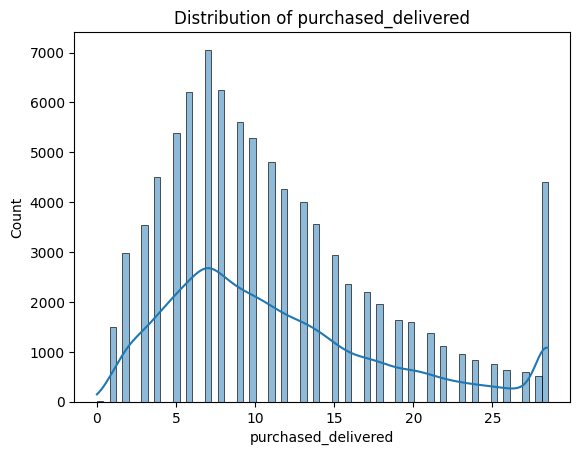

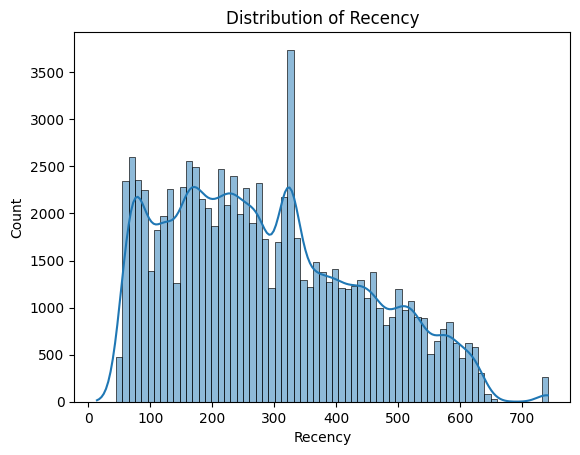

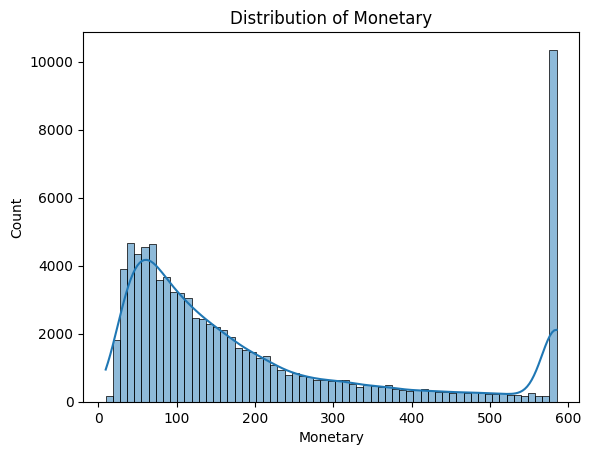

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X_train.select_dtypes(include=[np.number]).columns:
    sns.histplot(X_train[col], kde=True)  # dengan Kernel Density Estimation
    plt.title(f"Distribution of {col}")
    plt.show()



In [66]:
X_train.describe()

product_name_length  product_description_length  product_photos_qty  \
count         88815.000000                88815.000000        88815.000000   
mean             48.848016                  740.603153            2.146496   
std               9.953888                  511.815069            1.523496   
min              19.500000                    4.000000            1.000000   
25%              42.000000                  345.000000            1.000000   
50%              52.000000                  602.000000            1.000000   
75%              57.000000                  986.000000            3.000000   
max              76.000000                 1947.500000            6.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      88815.000000       88815.000000       88815.000000   
mean        1302.347734          29.673163          15.457355   
std         1342.202459          14.302418           9.911065   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max         4050.000000          68.000000          38.000000   

       product_width_cm  review_score  payment_installments  payment_value  \
count      88815.000000  88815.000000          88815.000000   88815.000000   
mean          22.742532      4.260024              2.819952     139.689583   
std           10.562649      0.962530              2.464194     104.647271   
min            6.000000      2.500000              0.000000       0.000000   
25%           15.000000      4.000000              1.000000      60.420000   
50%           20.000000      5.000000              2.000000     107.280000   
75%           30.000000      5.000000              4.000000     187.985000   
max           52.500000      5.000000              8.500000     379.332500   

       geolocation_lat  geolocation_lng  purchased_approved  approved_carrier  \
count     88815.000000     88815.000000        88815.000000      88815.000000   
mean        -21.954335       -46.179944        10572.753251          2.031515   
std           3.553840         3.751069        15710.208048          2.221645   
min         -28.687549       -54.804495            0.000000         -4.500000   
25%         -23.591202       -48.105099          780.000000          0.000000   
50%         -22.929319       -46.631584         1200.000000          1.000000   
75%         -20.193636       -43.638835        16740.000000          3.000000   
max         -15.097289       -36.939438        40680.000000          7.500000   

       carrier_delivered  delivered_estimated  purchased_delivered  \
count       88815.000000         88815.000000         88815.000000   
mean            8.054704            11.264696            11.405967   
std             5.910587             8.256698             7.063691   
min            -6.500000            -9.000000             0.000000   
25%             4.000000             6.000000             6.000000   
50%             7.000000            12.000000            10.000000   
75%            11.000000            16.000000            15.000000   
max            21.500000            31.000000            28.500000   

           Recency     Monetary  
count 88815.000000 88815.000000  
mean    285.848066   204.045815  
std     152.781930   179.213808  
min      14.000000     9.590000  
25%     162.000000    69.730000  
50%     266.000000   132.990000  
75%     394.000000   275.905000  
max     742.000000   585.167500

In [67]:
from sklearn.preprocessing import PowerTransformer

# Kolom yang perlu di-transformasi berdasarkan skewness
columns_to_transform = ['product_description_length', 'product_photos_qty', 'product_weight_g',
                        'product_length_cm', 'product_height_cm', 'product_width_cm', 
                        'payment_installments', 'payment_value', 'purchased_approved',
                        'approved_carrier', 'carrier_delivered', 'Monetary']

# Inisialisasi PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit dan transformasi data X_train
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])

# Terapkan transformasi yang sama pada X_test
X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

# Tampilkan hasil beberapa kolom yang sudah ditransformasi
print(X_train[columns_to_transform].head())
print(X_test[columns_to_transform].head())


        product_description_length  product_photos_qty  product_weight_g  \
65071                     0.326007            0.431926          1.515318   
2818                     -1.263529            1.325737         -1.376892   
105987                    0.530275           -0.929567          1.515318   
62668                     0.093204            0.431926         -0.173598   
67233                     1.790836           -0.929567         -1.376892   

        product_length_cm  product_height_cm  product_width_cm  \
65071            0.331719           1.217606          0.344180   
2818            -1.315701          -1.444726         -1.594527   
105987           1.495809           1.795616          0.611599   
62668            0.981528           0.635543          0.905750   
67233           -1.315701           0.279573         -1.594527   

        payment_installments  payment_value  purchased_approved  \
65071               0.162768      -0.766172           -0.061292   
2818        

In [68]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.871006
product_description_length   -0.026727
product_photos_qty            0.341223
product_weight_g             -0.003573
product_length_cm             0.122566
product_height_cm            -0.033111
product_width_cm              0.073179
review_score                 -0.854869
payment_installments          0.348122
payment_value                -0.011466
geolocation_lat               0.517637
geolocation_lng               0.256332
purchased_approved            0.027746
approved_carrier             -0.302846
carrier_delivered            -0.118608
delivered_estimated          -0.088175
purchased_delivered           0.889544
Recency                       0.459277
Monetary                      0.012137
dtype: float64

Skewness for X_test:
product_name_length          -0.861331
product_description_length   -0.035596
product_photos_qty            0.328457
product_weight_g              0.017890
product_length_cm             0.152399
produ

# 5. Feature encoding

In [69]:
# Cek kolom bertipe string di X_train
string_columns_train = X_train.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_train:\n{string_columns_train}\n")

# Cek kolom bertipe string di X_test
string_columns_test = X_test.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_test:\n{string_columns_test}\n")

# Periksa apakah kolom string di X_train dan X_test konsisten
if set(string_columns_train) == set(string_columns_test):
    print("Kolom string di X_train dan X_test konsisten.")
else:
    print("Kolom string di X_train dan X_test berbeda.")
    print(f"Kolom string yang ada di X_train tetapi tidak di X_test: {set(string_columns_train) - set(string_columns_test)}")
    print(f"Kolom string yang ada di X_test tetapi tidak di X_train: {set(string_columns_test) - set(string_columns_train)}")


Kolom bertipe string di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom bertipe string di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom string di X_train dan X_test konsisten.


In [72]:
from sklearn.preprocessing import LabelEncoder

# 1. Apply One-Hot Encoding to nominal categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'], drop_first=True)

# 2. Apply Label Encoding to the ordinal 'order_status' column
le = LabelEncoder()
X_train_encoded['order_status_encoded'] = le.fit_transform(X_train_encoded['order_status'])
X_test_encoded['order_status_encoded'] = le.transform(X_test_encoded['order_status'])  # Use the same transformation for X_test

# Drop the original 'order_status' column after encoding
X_train_encoded.drop(['order_status'], axis=1, inplace=True)
X_test_encoded.drop(['order_status'], axis=1, inplace=True)

# Drop other columns that are no longer needed
# If there are any extra columns not needed after encoding (such as the old non-encoded versions)
# columns_to_drop = ['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type']
# X_train_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)
# X_test_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)



In [73]:
X_train_encoded

product_name_length  product_description_length  product_photos_qty  \
65071             34.000000                    0.326007            0.431926   
2818              46.000000                   -1.263529            1.325737   
105987            19.500000                    0.530275           -0.929567   
62668             53.000000                    0.093204            0.431926   
67233             36.000000                    1.790836           -0.929567   
...                     ...                         ...                 ...   
38163             39.000000                   -1.589779            0.431926   
17812             44.000000                    0.563293            1.641458   
14546             40.000000                   -1.320696           -0.929567   
40033             54.000000                   -1.208617           -0.929567   
104110            57.000000                   -0.559316            1.014094   

        product_weight_g  product_length_cm  product_height_cm  \
65071           1.515318           0.331719           1.217606   
2818           -1.376892          -1.315701          -1.444726   
105987          1.515318           1.495809           1.795616   
62668          -0.173598           0.981528           0.635543   
67233          -1.376892          -1.315701           0.279573   
...                  ...                ...                ...   
38163          -0.644010          -0.020252          -0.683269   
17812           1.120363           1.353848          -0.396117   
14546          -0.038521           0.729184          -0.845110   
40033           0.398042           0.981528          -1.220598   
104110          1.515318           0.887368           1.343947   

        product_width_cm  review_score  payment_installments  payment_value  \
65071           0.344180      4.000000              0.162768      -0.766172   
2818           -1.594527      5.000000              0.692728      -1.253192   
105987          0.611599      5.000000             -0.931449       1.278389   
62668           0.905750      4.000000              1.571140      -0.056812   
67233          -1.594527      5.000000              0.162768      -0.597761   
...                  ...           ...                   ...            ...   
38163          -0.102265      4.000000             -0.931449      -0.876150   
17812           0.905750      5.000000             -0.931449      -0.371242   
14546           0.691023      3.000000              1.003395      -0.482965   
40033           0.837770      5.000000              0.692728      -0.167591   
104110          0.766297      3.000000              0.162768       0.310762   

        geolocation_lat  geolocation_lng  purchased_approved  \
65071        -23.616209       -46.635296           -0.061292   
2818         -28.687549       -52.326320           -0.641299   
105987       -23.519833       -46.481335            1.544674   
62668        -15.097289       -38.980318           -0.350786   
67233        -23.629364       -46.524507           -0.397645   
...                 ...              ...                 ...   
38163        -23.759561       -46.843837           -0.178949   
17812        -23.539167       -46.717316           -0.536498   
14546        -23.687269       -46.659426           -0.604016   
40033        -23.644279       -46.663049           -0.681417   
104110       -23.323582       -46.571516           -0.724851   

        approved_carrier  carrier_delivered  delivered_estimated  \
65071           0.961024          -1.488200             2.000000   
2818            0.185443           0.347455            31.000000   
105987          1.971923          -1.488200            17.000000   
62668          -0.318430           0.643539            13.000000   
67233           0.961024          -1.971257            13.000000   
...                  ...                ...                  ...   
38163          -0.318430           0.014267             7.000000   
1781